# **Exploring the Evolution of Billionaires**
- Omar Emara 228248 A3
- Amir Mohamed 224030 A3



# **1. Data Cleaning**

## **1.1. Dependencies**

In [189]:
%pip install missingno
%pip install seaborn
%pip install nbformat>=4.2.0
%pip install folium
%pip install geopy
%pip install requests beautifulsoup4

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.



## **1.2. Links to Datasets Used**

**Forbes Billionaires Evolution:** *https://www.kaggle.com/datasets/guillemservera/forbes-billionaires-1997-2023?select=all_billionaires_1997_2023.csv* <br/>
**Genders:** *https://archive.ics.uci.edu/dataset/591/gender+by+name*<br/>
**Capitals:** *https://www.kaggle.com/datasets/sirishasingla1906/countries-of-the-world?resource=download*

## **1.3. Imports**

In [190]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import re

### **1.3.1. For Google Colab**

In [191]:
# from google.colab import drive

# drive.mount('/content/drive')
# drive_path = "drive/MyDrive/data_science"

# df = pd.read_csv("{path}/billionaires.csv".format(path=drive_path))
# genders = pd.read_csv('{path}/genders.csv'.format(path=drive_path))
# capitals = pd.read_csv('{path}/countries.csv'.format(path=drive_path))


### **1.3.2. For Local Development**

In [192]:
df = pd.read_csv("./billionaires.csv")
genders = pd.read_csv('./genders.csv')
capitals = pd.read_csv('./countries.csv')

## **1.4. Loading Billionaries' Dataset**

In [193]:

print("data frame shape: ", df.shape)
df.head(10)

data frame shape:  (31732, 19)


,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_category,business_industries,organization_name,position_in_organization,self_made,wealth_status
0,1997,7,NaN,2.0 B,Sophonpanich,Chatri,Chatri Sophonpanich & family,1934-02-28,73.0,Male,Thailand,Thailand,Bangkok,Finance and Investments,['Finance and Investments'],NaN,NaN,False,NaN
1,1997,7,NaN,1.8 B,Adulyadej,King Bhumibol,King Bhumibol Adulyadej,1927-12-05,69.0,Male,Thailand,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN
2,1998,7,NaN,3.3 B,Safra,Edmond,Edmond Safra,1932-08-06,65.0,Male,Lebanon,Lebanon,NaN,NaN,NaN,NaN,NaN,True,NaN
3,1999,7,NaN,1.0 B,Hinduja,"Srichand, Gopichand,",Srichand & Gopichand Hinduja,1935-11-28,NaN,NaN,India,United Kingdom,London,NaN,NaN,NaN,NaN,False,NaN
4,1999,7,NaN,7.1 B,Schwarz,Dieter,Dieter Schwarz,1939-09-24,59.0,Male,Germany,Germany,Neckarsulm,Fashion & Retail,['Fashion & Retail'],NaN,NaN,True,NaN
5,1999,7,NaN,1.3 B,Ardila Lulle,Carlos,Carlos Ardila Lülle,1930-06-04,68.0,Male,Colombia,Colombia,Bogota,Food and Beverage,['Food and Beverage'],NaN,NaN,True,NaN
6,1999,7,NaN,2.9 B,Ebner,Martin,Martin Ebner,1945-08-01,53.0,Male,Switzerland,Switzerland,Wilen,Finance and Investments,['Finance and Investments'],NaN,NaN,False,NaN
7,1999,7,NaN,1.0 B,Cutrale,Jose,Jose Luis Cutrale,1946-09-17,NaN,Male,Brazil,Brazil,Sao Paulo,Food and Beverage,['Food and Beverage'],NaN,NaN,True,NaN
8,1999,7,NaN,1.1 B,Lee,Peter,Lee family,NaN,71.0,Male,Hong Kong,Hong Kong,Hong Kong,NaN,NaN,NaN,NaN,False,NaN
9,1999,7,NaN,1.8 B,Kampf,Serge,Serge Kampf,1934-01-01,65.0,Male,France,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN


## **1.5. Visualizing nulls**

============== Features Data Types ============== 
 year                          int64
month                         int64
rank                        float64
net_worth                    object
last_name                    object
first_name                   object
full_name                    object
birth_date                   object
age                         float64
gender                       object
country_of_citizenship       object
country_of_residence         object
city_of_residence            object
business_category            object
business_industries          object
organization_name            object
position_in_organization     object
self_made                    object
wealth_status                object
dtype: object
============== Null Values Counts ============== 
 year                            0
month                           0
rank                           18
net_worth                       0
last_name                    3689
first_name                   

<Axes: >

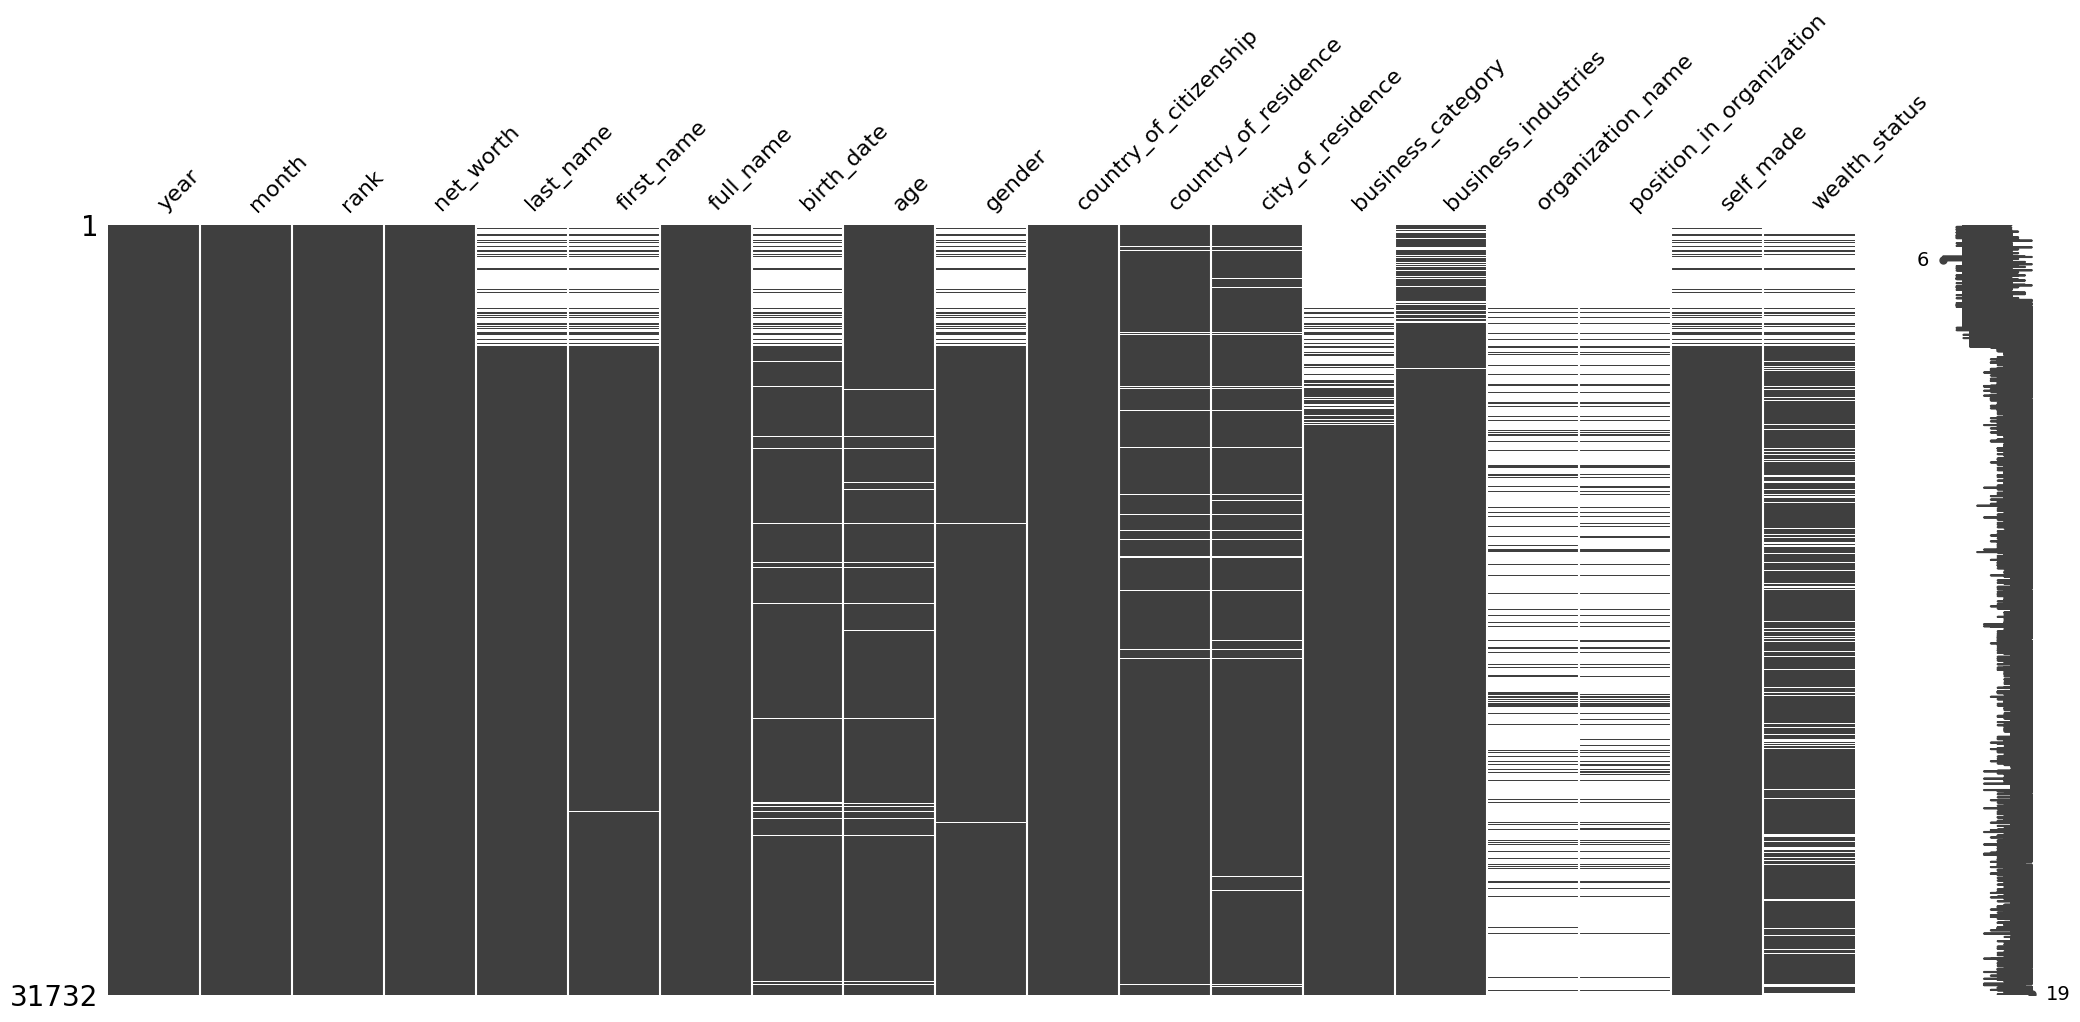

In [194]:
print("============== Features Data Types ============== \n", df.dtypes)
print("============== Null Values Counts ============== \n", df.isnull().sum())
msno.matrix(df)

## **1.6. Cleaning Features**


### **1.6.1. Filling empty first_name and last_name**

In [195]:
first_name_list = list(df.first_name.isnull().index)
last_name_list = list(df.last_name.isnull().index)

# filling the first name
df.loc[first_name_list, 'first_name'] = (df.loc[first_name_list, 'full_name']
                                        .str
                                        .split()
                                        .apply(lambda x: x[0]))

# filling the second name
df.loc[last_name_list, 'last_name'] = (df.loc[last_name_list, 'full_name']
                                        .str
                                        .split()
                                        .apply(lambda x: x[-1]))

### **1.6.2. Cleaning net_worth from prefixes and casting it to float**

In [196]:
if df['net_worth'].dtype != 'float64':
  df['net_worth'] = df['net_worth'].str.replace('B', "").astype(float)

### **1.6.3. Deducing age and birth_year from birth_date**


In [197]:


df['birth_date'] = pd.to_datetime(df['birth_date'], errors='coerce')
df['birth_year'] = df['birth_date'].dt.year.astype('Int64')

df['both_missing'] = (df['age'].isna() & df['birth_date'].isna())

# Fill missing birth_year with year - age
missing_year = ~df['both_missing'] & df['birth_year'].isna() & ~df['age'].isna()
df.loc[missing_year, 'birth_year'] = df.loc[missing_year, 'year'] - df.loc[missing_year, 'age']

# Fill missing age with year - birth_year
missing_age = ~df['both_missing'] & df['age'].isna() & ~df['birth_year'].isna()
df.loc[missing_age, 'age'] = df.loc[missing_age, 'year'] - df.loc[missing_age, 'birth_year']

# Fill missing birth_date with first day of the year
missing_birthdate = ~df['both_missing'] & df['birth_date'].isna() & ~df['birth_year'].isna()
df.loc[missing_birthdate, 'birth_date'] = pd.to_datetime(df.loc[missing_birthdate, 'birth_year'].astype(str) + '-01-01')

df.drop('both_missing', axis=1, inplace=True)

### **1.6.4. Deduce gender from first_name**


In [199]:

name_gender_map = dict(zip(genders['Name'], genders['Gender'].map({'M': 'Male', 'F': 'Female'})))
df.loc[df['gender'].isnull(), 'gender'] = df.loc[df['gender'].isnull(), 'first_name'].map(name_gender_map)

df["gender"].isnull().sum()

479

### **1.6.5. Filling country_of_residency**


In [200]:
residency_list = list(df.country_of_residence.isnull())
df.loc[residency_list, 'country_of_residence'] = df.loc[residency_list, 'country_of_citizenship']

citizenship_list= list(df.country_of_citizenship .isnull())
df.loc[citizenship_list,'country_of_citizenship'] = df.loc[citizenship_list,'country_of_residence']

### **1.6.6. Dropping unncessary features**


In [201]:
for feature in ['position_in_organization', 'organization_name', 'business_category']:
    if feature in df:
        del df[feature]

### **1.6.7. Deducing self_made feature from year's self_made mean**

In [202]:
avg_self_made = df.groupby('year')['self_made'].mean()
self_made_list = list(df.self_made.isnull())
df.loc[self_made_list, 'self_made'] = (df.loc[self_made_list, 'year']
                                         .apply(lambda year: round(avg_self_made[year]) == 1))

###  **1.6.8. Filling empty wealth_status values**

In [203]:
df.sort_values(by=['full_name', 'year'], inplace=True)

def determine_wealth_status(current_net_worth, previous_net_worth):
    if pd.isna(previous_net_worth):
        return 'returned to list'
    elif current_net_worth > previous_net_worth:
        return 'increased'
    elif current_net_worth < previous_net_worth:
        return 'decreased'
    else:
        return 'remained even'

for index, row in df.iterrows():
    previous_row = df[(df['full_name'] == row['full_name']) & (df['year'] == row['year'] - 1)]
    if len(previous_row) > 0:
        previous_net_worth = previous_row['net_worth'].values[0]
        df.at[index, 'wealth_status'] = determine_wealth_status(row['net_worth'], previous_net_worth)
    else:
        df.at[index, 'wealth_status'] = 'returned to list'

print(df)


       year  month    rank  net_worth   last_name first_name   
26342  2021      4  2674.0        1.0       Adair         A.  \
28871  2022      4  2448.0        1.1       Adair         A.   
31224  2023      4  2133.0        1.3       Adair         A.   
138    2001      7   151.0        3.0   Perenchio         A.   
465    2002      3   152.0        2.6   Perenchio         A.   
...     ...    ...     ...        ...         ...        ...   
20291  2019      3   838.0        2.7  Solorz-Zak    Zygmunt   
22474  2020      4   875.0        2.4  Solorz-Zak    Zygmunt   
24647  2021      4   956.0        3.2  Solorz-Zak    Zygmunt   
27506  2022      4  1053.0        2.9  Solorz-Zak    Zygmunt   
30650  2023      4  1516.0        2.0  Solorz-Zak    Zygmunt   

                  full_name birth_date   age gender country_of_citizenship   
26342       A. Jayson Adair 1969-10-16  51.0   Male          United States  \
28871       A. Jayson Adair 1969-10-16  52.0   Male          United States 

### **1.6.9. Filling empty city_of_residence values**

In [204]:
def getCapital(name):
    records = capitals[capitals['Countries'] == name]
    if len(records) == 0:
        return np.nan
    else:
        record = records.iloc[0]
        return record['Capital']

empty_valuses = df['city_of_residence'].isnull()
df.loc[empty_valuses, 'city_of_residence'] = df.loc[empty_valuses, 'country_of_citizenship'].apply(lambda x: getCapital(x))

### **1.6.10. Dropping remaining nulls**

In [205]:
df= df.dropna()

### **1.6.11. Clean business_industries feature**

In [206]:
def clean_industry(x: str):
    x = re.sub(r'[\[\]\'\']', '', x)
    x = re.sub(r'\s+and\s+', ' & ', x)
    x = re.sub(r'\s+&#38;\s+', ' & ', x)

    return x.strip()

df.loc[:, 'business_industries'] = df['business_industries'].apply(clean_industry)
df.loc[df['business_industries'].str.lower().isin(['healthcare', 'health care']), 'business_industries'] = "Healthcare"

### **1.6.12. Duplicated values**

**Note:** The dataset has top billionaires data from 1998 till 2023, so it is logical that most of the billionaires show up in more than one year but with updated net worth and rank. It wouldn't be a logical option to drop them because that would affect the observations drastically.

In [207]:
df.duplicated().sum()

1

## **1.7. Outliers**

**Note:** The outliers cannot be dropped given that the top outliers or the top bilionaires's net worth growth is crucial for the studies in the notebook. The dataset itself studies bilionaires who are outlieres themselves that their various net worth cannot be plotted in the right way.

### **1.7.1 Outliers in net worth**

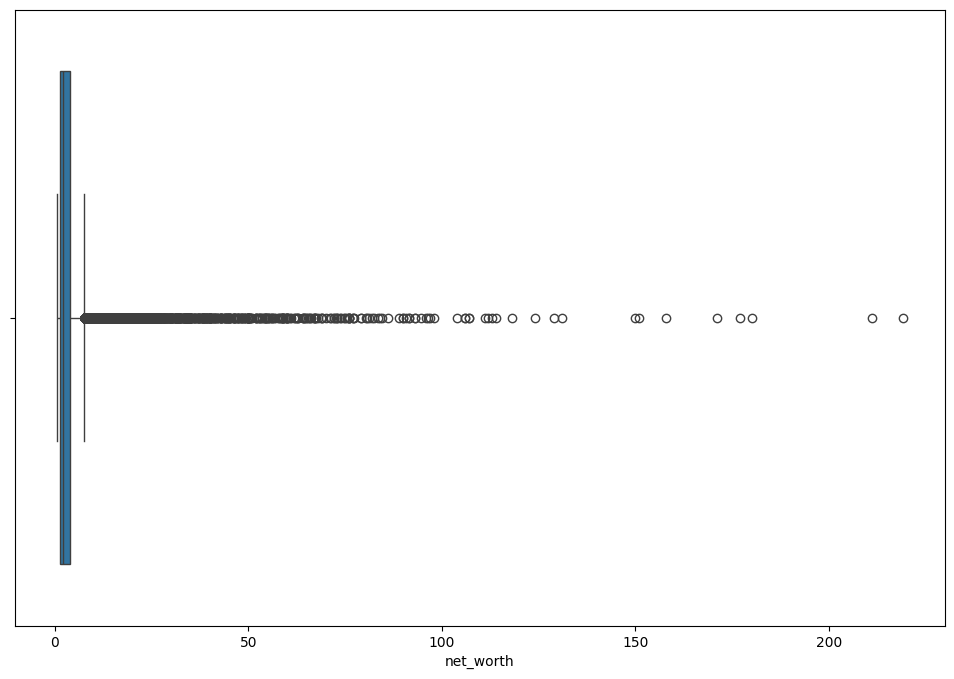

In [208]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='net_worth', data=df) 
plt.show()

### **1.7.2 Outliers plot of the top 200 bilionaries and their industries**

C:\Users\emara\AppData\Local\Temp\ipykernel_87944\3733939258.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.




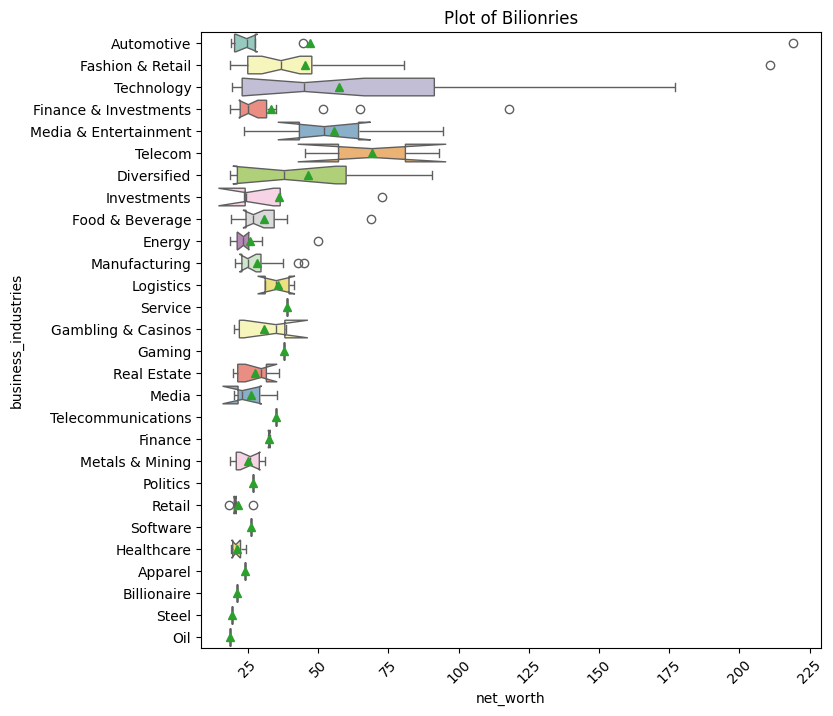

In [209]:
top_bilioners= df.groupby(['full_name', 'country_of_residence', 'business_industries'])['net_worth'].max().reset_index().sort_values('net_worth', ascending=False).head(200)
plt.figure(figsize=(8, 8))
sns.boxplot(
    x = "net_worth",
    y = "business_industries",  
    showmeans=True,  
    data=top_bilioners, 
    notch=True,  
    palette="Set3" 
) 
plt.title("Plot of Bilionries") 
plt.xticks(rotation=45) 

plt.show()

### **1.7.3 Top 200 bilionries in net worth**

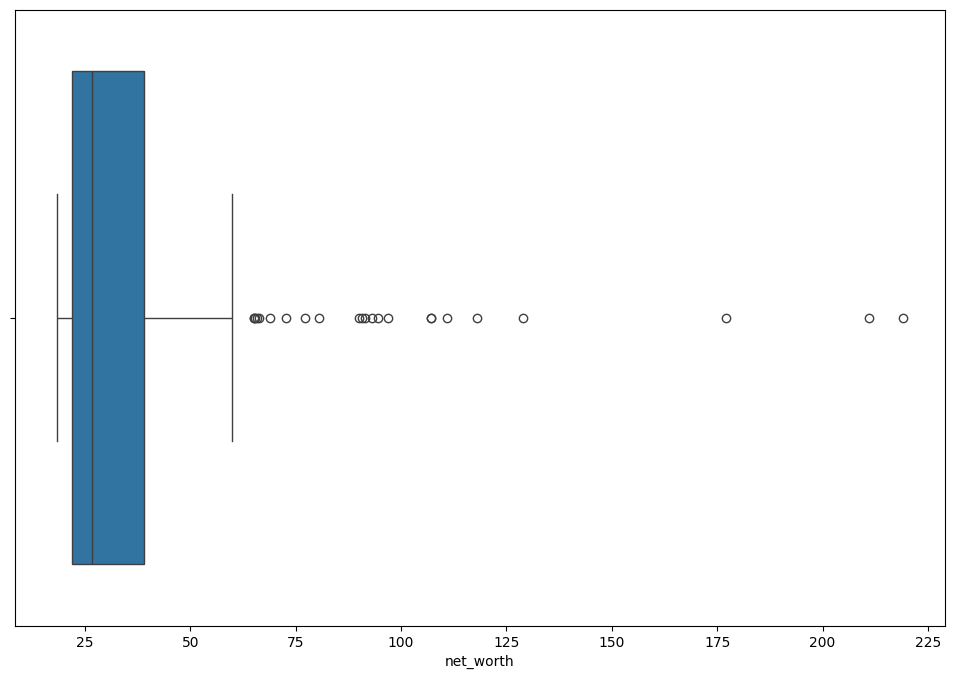

In [210]:
plt.figure(figsize=(12, 8))
sns.boxplot(x='net_worth', data=top_bilioners) 
plt.show()

# **2. Visualizations**

## **2.1. Internal Questions**

### **2.1.1. Average age across industries with respect to citizenship and gender: Amir**
**Q: How does the average age at which billionaires achieve their status differ across industries, countries of origin, and gender over the years of study?**

**Observations:**
- Business Industries:
    - The average age varies significantly across different industries. Billionaires from industries like "Gambling & Casinos" and "Hotels & Resorts" tend to have a higher average age compared to those from other industries. This pattern is preserved over the years.
- Countries of Origin:
    - Billionaires from "China" and "Russia" tend to achieve their status at a much younger age compared to other countries across most industries. Billionaires from "Germany" and "the United States" tend to have the highest average age across all. This pattern is preserved over the years.
- Gender:
    - The difference between the average age of billionaires across genders does not vary hugely across industries, it is almost about 2 to 5 or 7 years.
    - However, some industries like "Medicine", "Consumer Products", and "Hotels & Resorts" tend to have a huge difference in average age between the genders of about 20 to 40 years for females, meaning they achieve wealth relatively late compared to males in these industries.
    - In recent years (2017 to 2023), however, the difference is subtle with males achieving wealth about 2 to 5 years later compared to females.

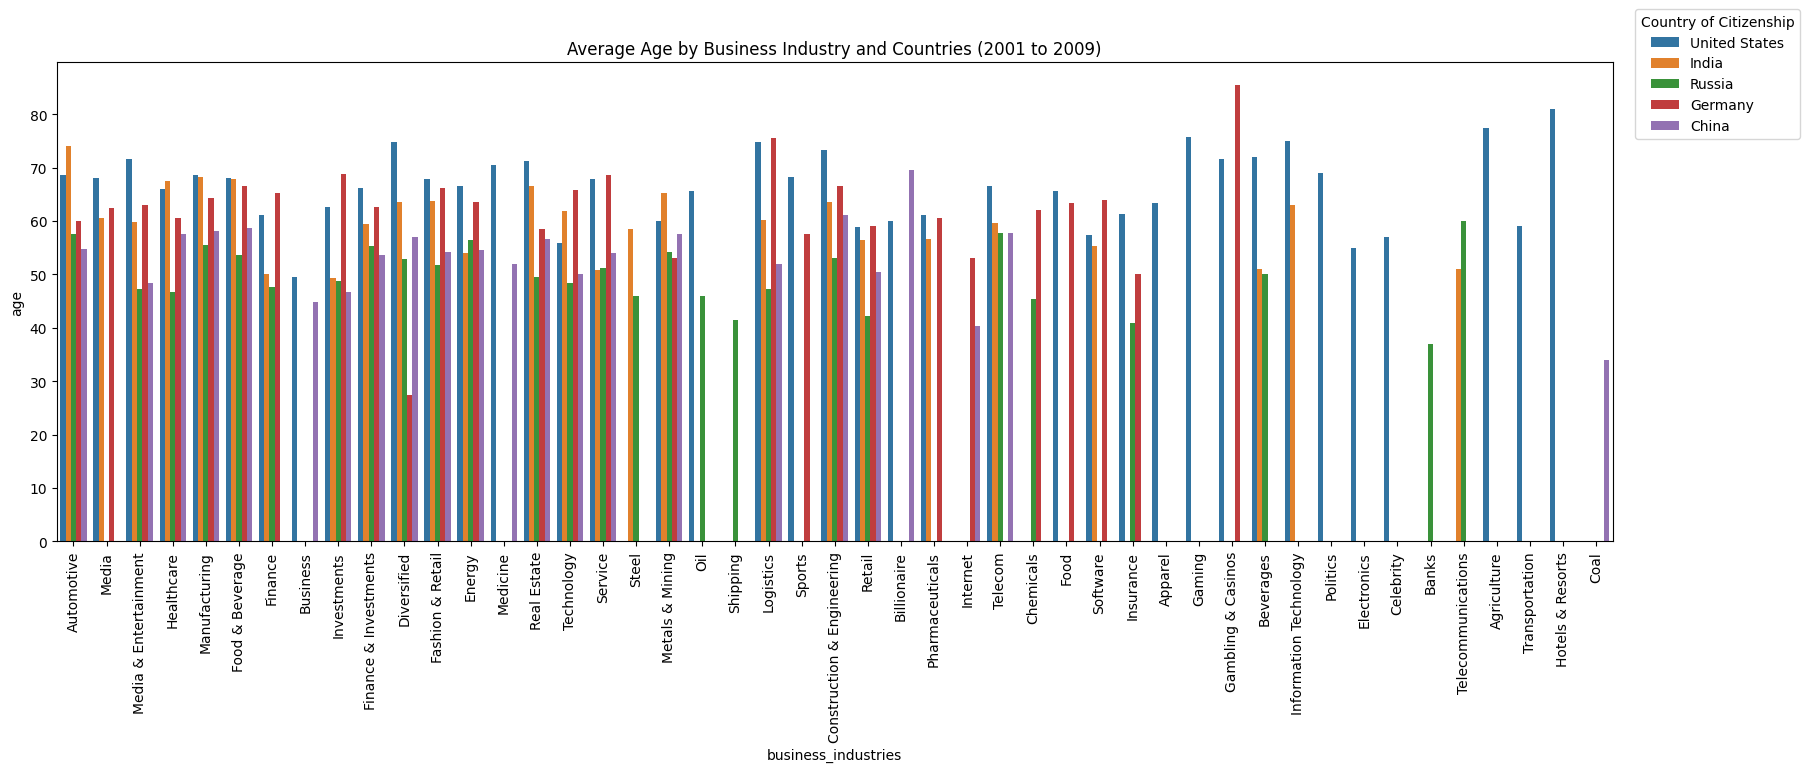

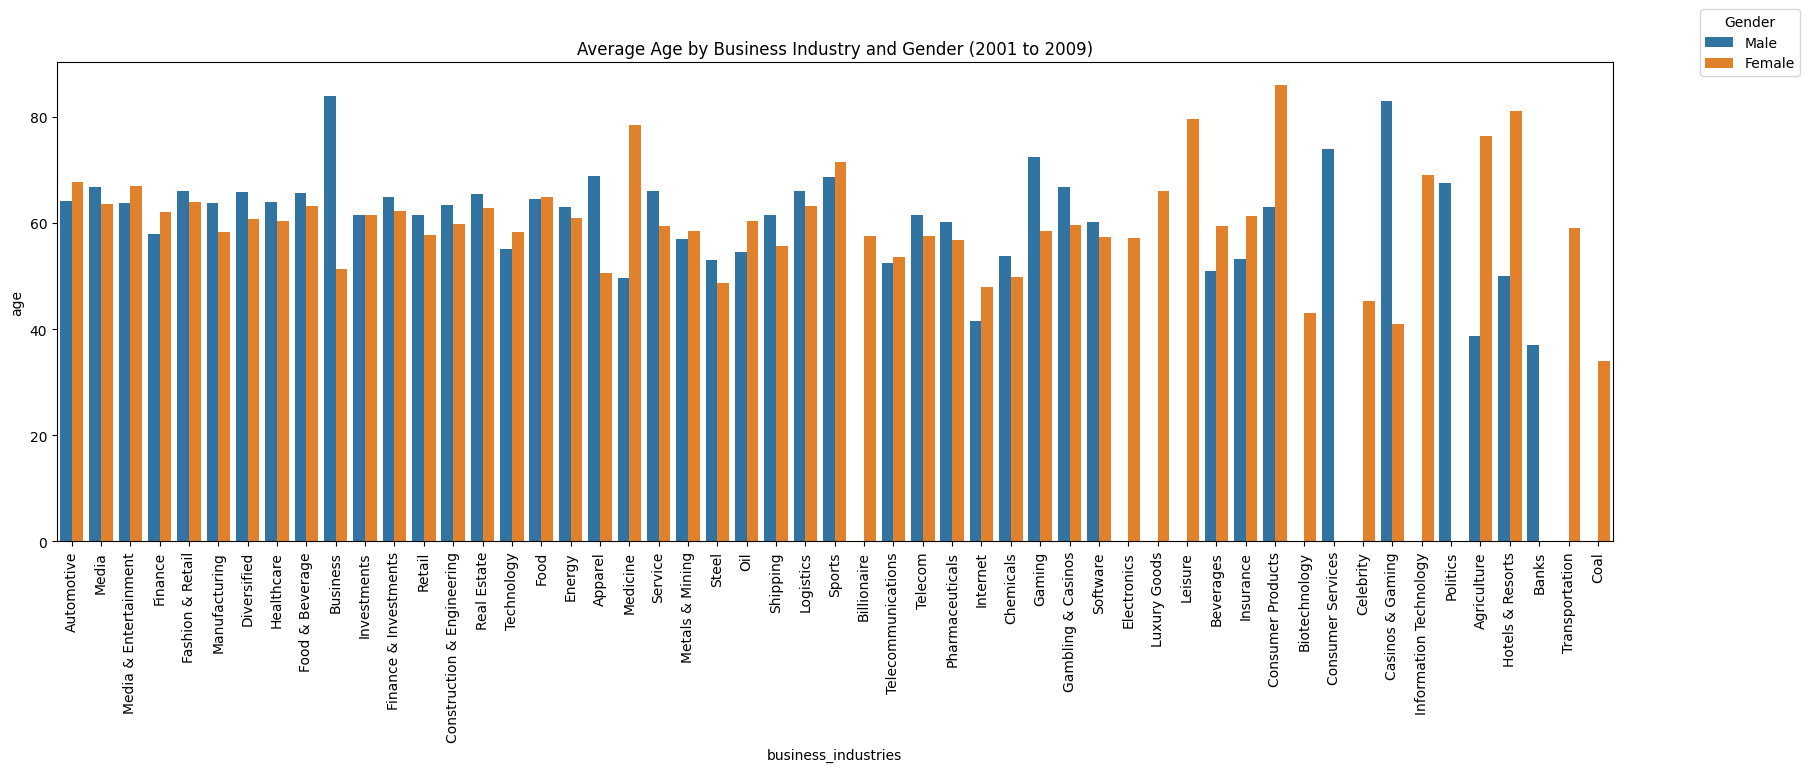

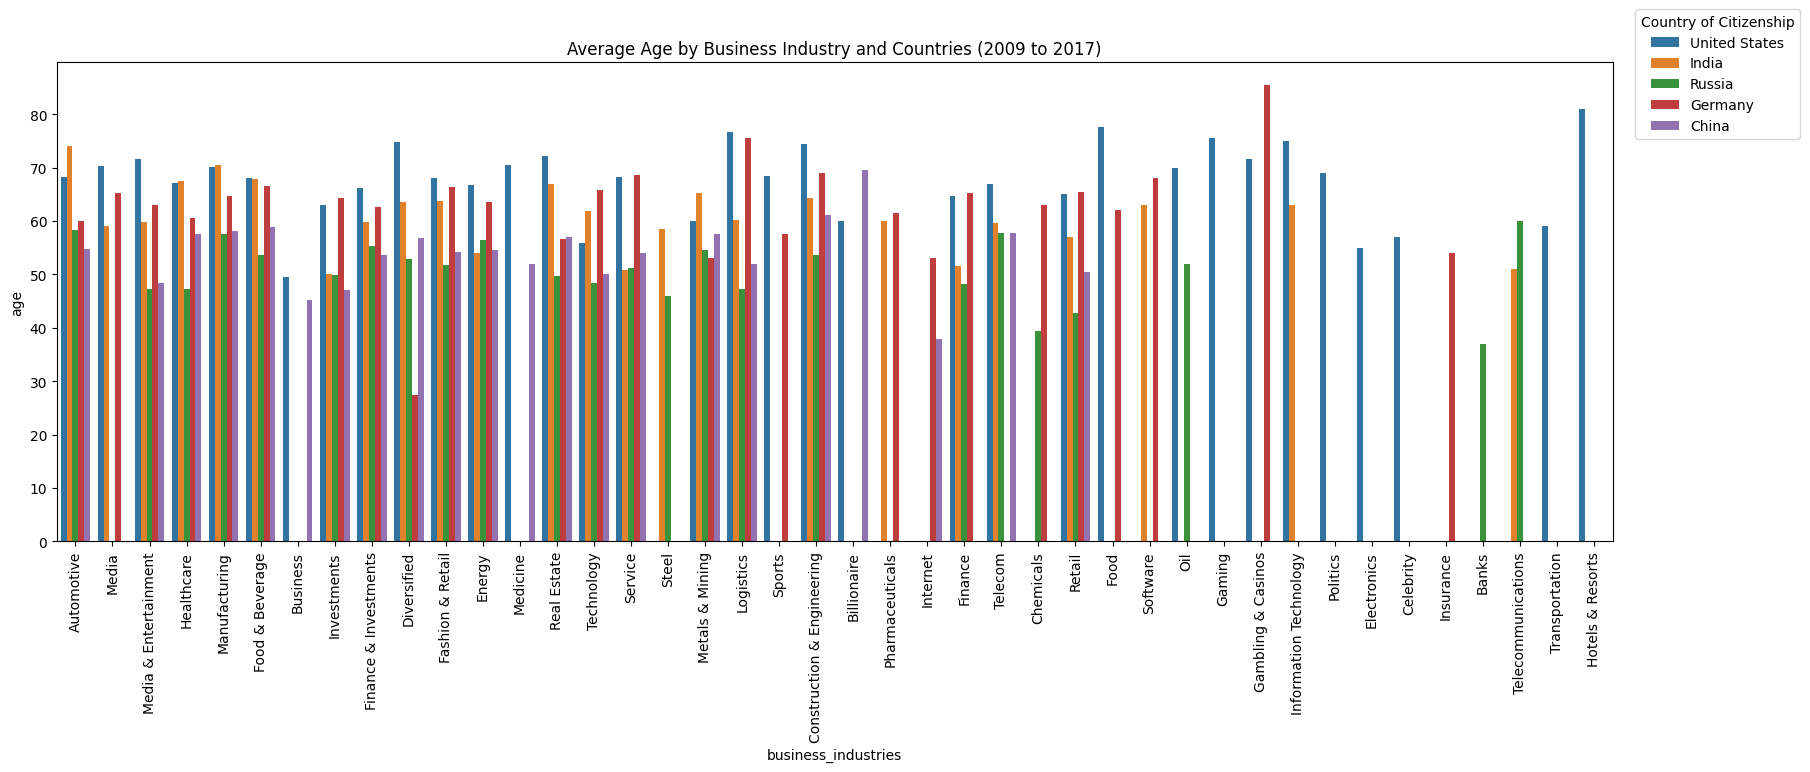

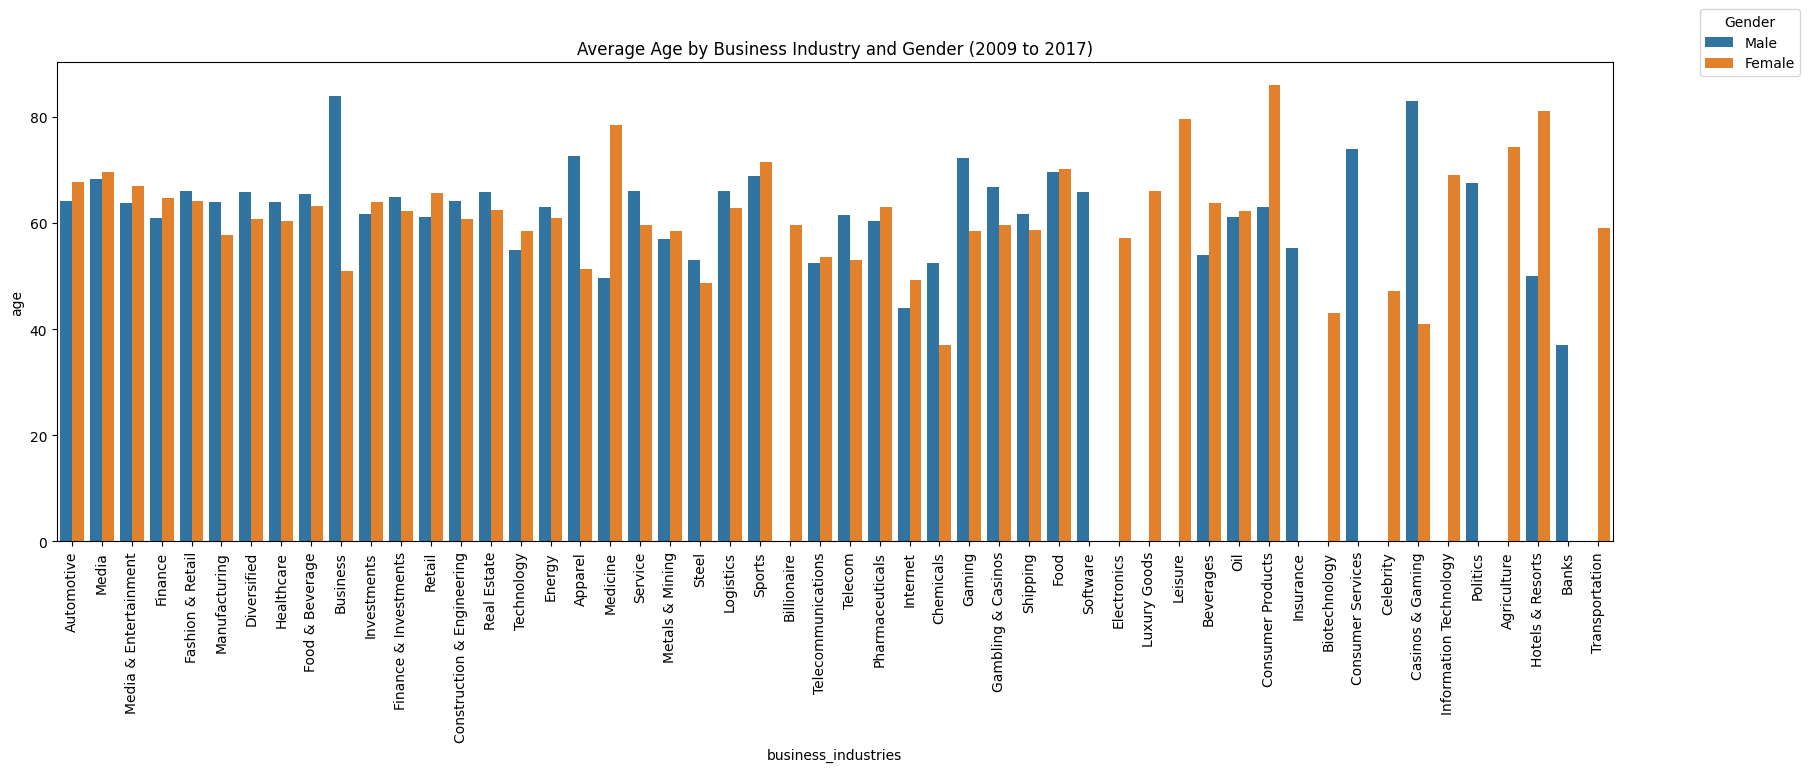

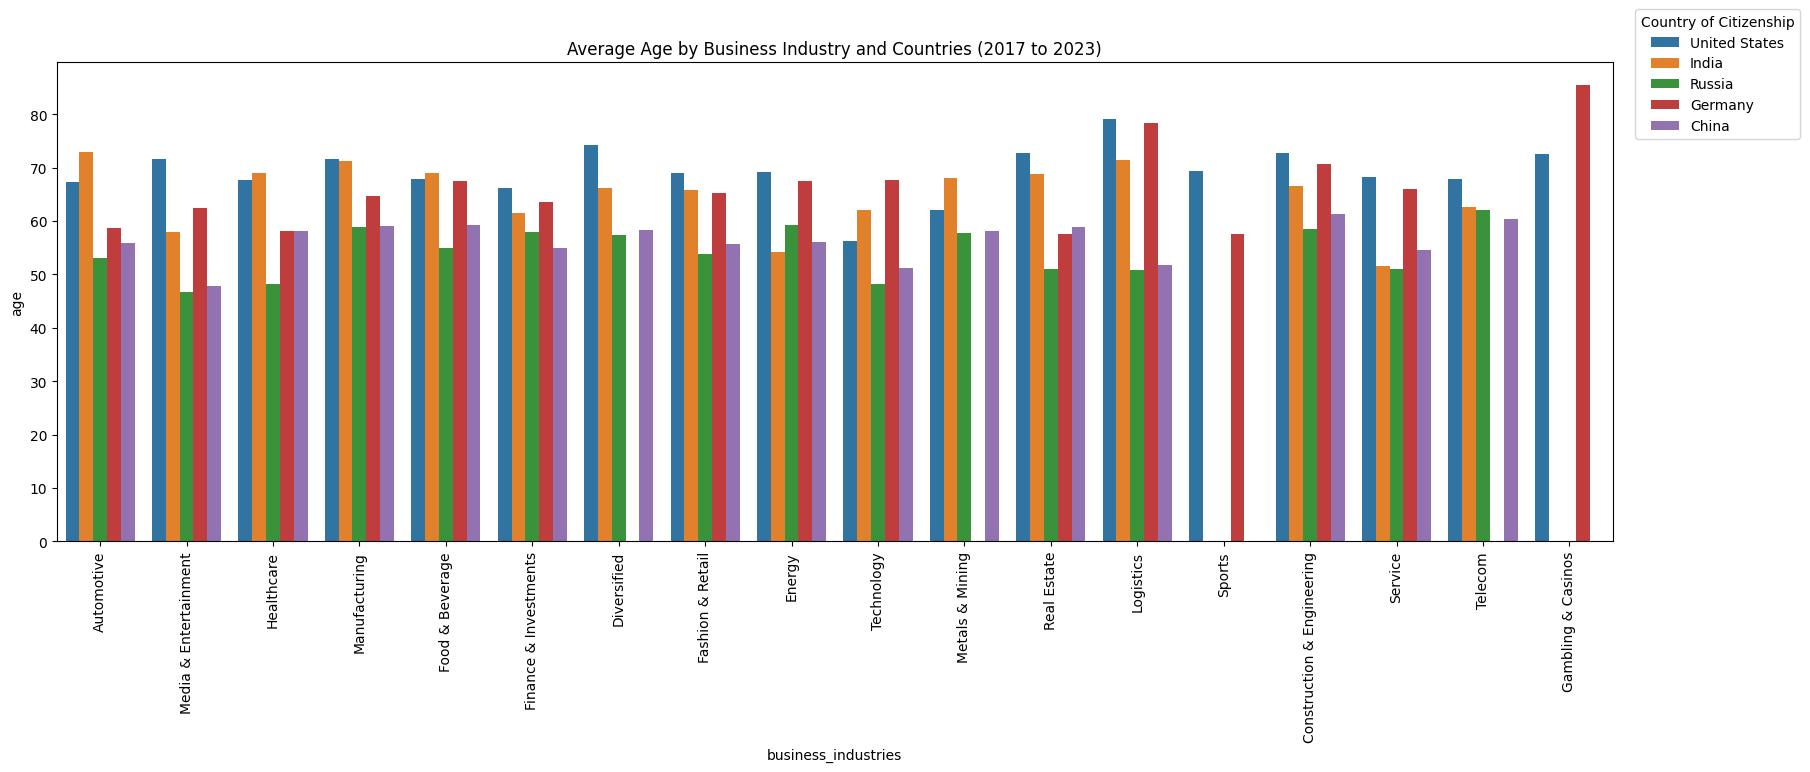

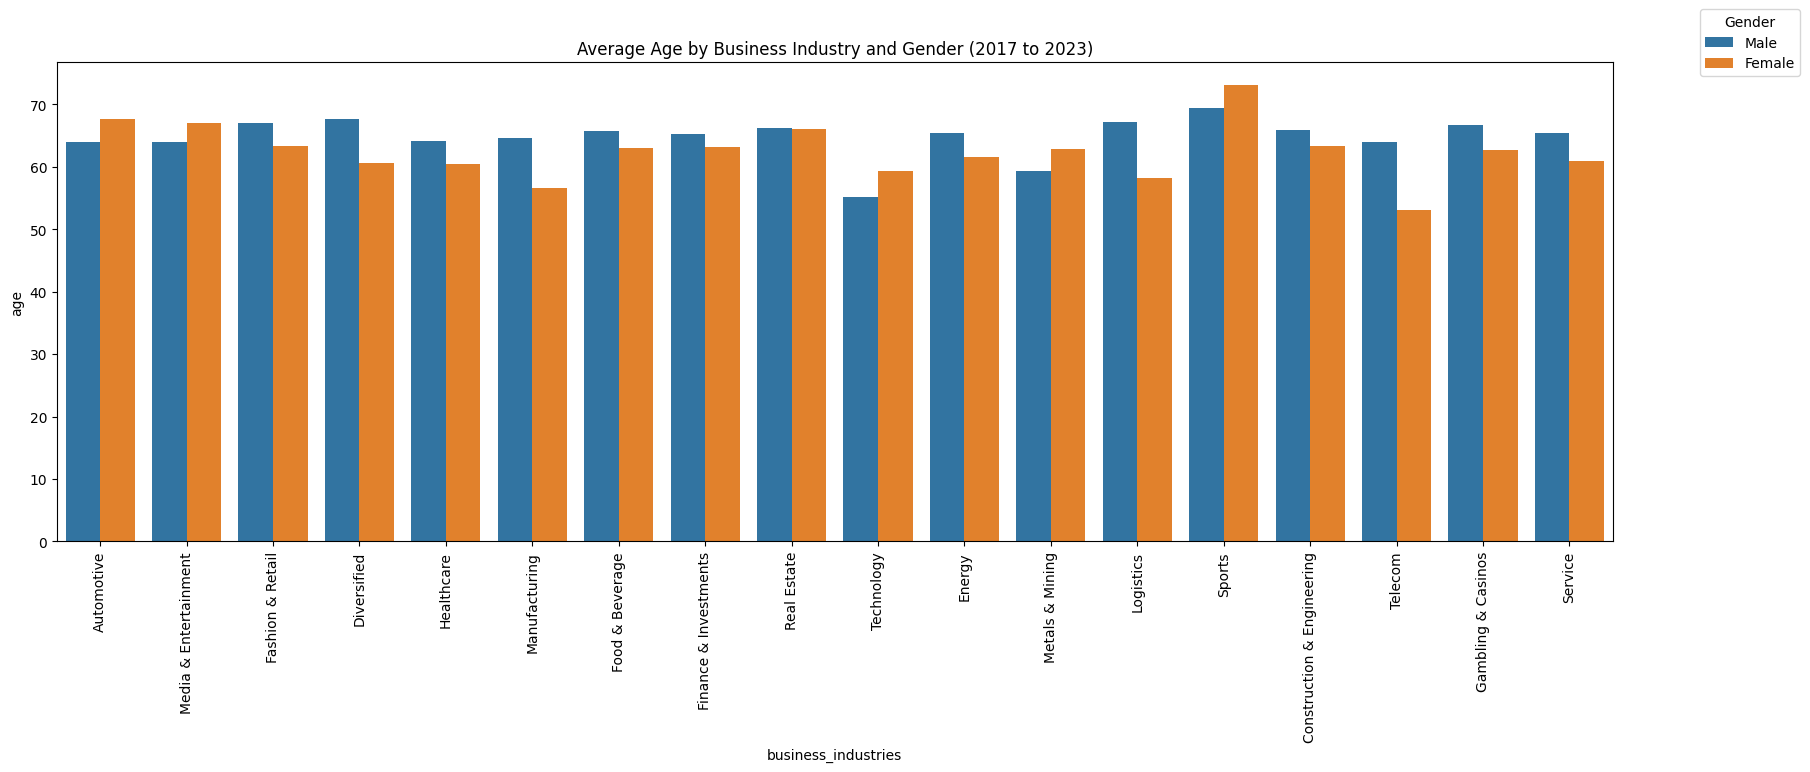

In [211]:
data = df
def barplot(x, y, hue, title, legend_title, data=data):
    plt.figure(figsize=(18, 8))
    ax = sns.barplot(x=x, y=y, data=data, hue=hue, errorbar=None)
    ax.legend(title=legend_title, loc="upper right", bbox_to_anchor=(1.125, 1.125))
    plt.title(title)
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


year_step = 8
start_year = data["year"].min()
last_year = data["year"].max()

for year in range(start_year, last_year + 1, year_step):
    data = data[data["year"] >= year]

    # Average age by business industry and top n countries
    n = 5
    top_countries = data['country_of_citizenship'].value_counts().nlargest(n).index.tolist()
    filtered_data = data[data['country_of_citizenship'].isin(top_countries)]

    barplot(x="business_industries",
            y="age",
            hue="country_of_citizenship",
            title="Average Age by Business Industry and Countries ({} to {})".format(year, min(year + year_step, last_year)),
            legend_title="Country of Citizenship",
            data=filtered_data)

    # Average age by business industry and gender
    barplot(x="business_industries",
            y="age",
            hue="gender",
            title="Average Age by Business Industry and Gender ({} to {})".format(year, min(year + year_step, last_year)),
            legend_title="Gender",
            data=data)

### **2.1.2. Concentration of Industries Across Countries: Amir**

**Q: Do specific countries or regions have a higher concentration of billionaires who specialize in particular business categories?**

**Observations:**
- United States:
    - Technology and Finance & Investments are the dominant business categories among billionaires in the United States.
    - Other significant business categories include Real Estate and Food & Beverages.

- China:
    - Technology and Manufacturing are the primary business categories among billionaires in China.
    - There is also a notable presence of billionaires in the Healthcare and Real Estate sectors.

- India:
    - Healthcare, Manufacturing, and Diversified sectors have a significant presence among billionaires in India.

- Other Countries:
    - Various business categories are represented among billionaires in other countries such as Russia, Germany, United Kingdom, Switzerland, Hong Kong, Brazil, and Canada.
    - The concentration of billionaires in specific business categories varies across these regions.


In [212]:
data = df
filtered_data = data[['country_of_citizenship',
                    'country_of_residence',
                    'business_industries']]

grouped_data = (filtered_data.groupby(['country_of_citizenship',
                                      'business_industries'])
                                      .size()
                                      .reset_index(name='count'))

fig = px.treemap(grouped_data,
                 path=['country_of_citizenship', 'business_industries'],
                 values='count',
                 color='count',
                 color_continuous_scale='Viridis',
                 title='Concentration of Billionaires by Country and Business Industry')


fig.update_layout(margin=dict(t=50, l=25, r=25, b=25))
fig.show()

### **2.1.3. Average Net Worth Over Time by Self-Made Status: Amir**
**Q: How does the rate of wealth growth or decline vary between self-made and non-self-made billionaires over time?**

**Observations:**
- Self-Made:
    - The average net worth of self-made billionaires shows a general increasing trend over time, with some fluctuations, experiencing a significant leap upwards from 2009 to 2011.
    - Overall, the trend appears to be upward.

- Non-Self-Made:
    - The average net worth of non-self-made billionaires also displays fluctuations over time.
    - However, the trend seems to be less volatile compared to self-made billionaires, and the overall trend is moving upward.


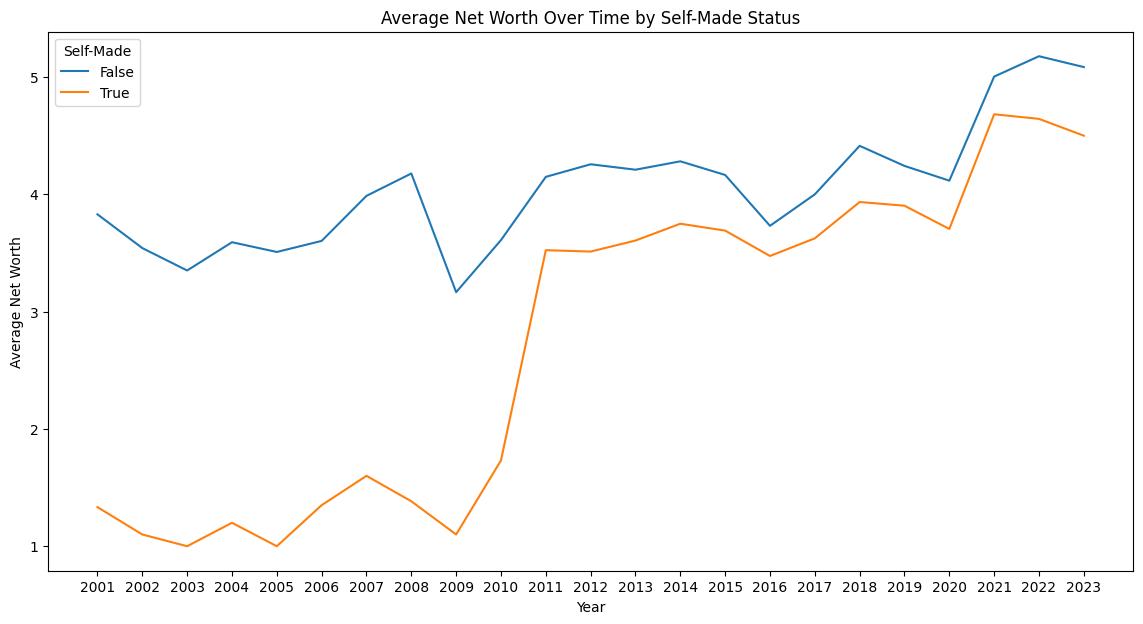

In [213]:
data = df

plt.figure(figsize=(14, 7))
sns.lineplot(data=data, x='year', y='net_worth', hue='self_made', errorbar=None)
plt.title('Average Net Worth Over Time by Self-Made Status')
plt.xlabel('Year')
plt.xticks(data["year"].unique())
plt.ylabel('Average Net Worth')
plt.legend(title='Self-Made')
plt.show()

### **2.1.4. Top Industries of Billionaires' Concentration: Amir**

**Q: What are the top 3 industries with the highest concentration of billionaires, and how does this distribution change over the years?**

**Observations:**
- **Trends in Industries**:
    - Industries like Finance, Fashion & Retail, and Real Estate seem to be the top 3 industries for the longest time.
    - In the recent 3 years, Technology, Finance & Investments, and Manufacturing occupy the top 3 industries with billionaire contributions.
    - Media and Finance were the dominating industries in terms of billionaires concentration up until 2009.

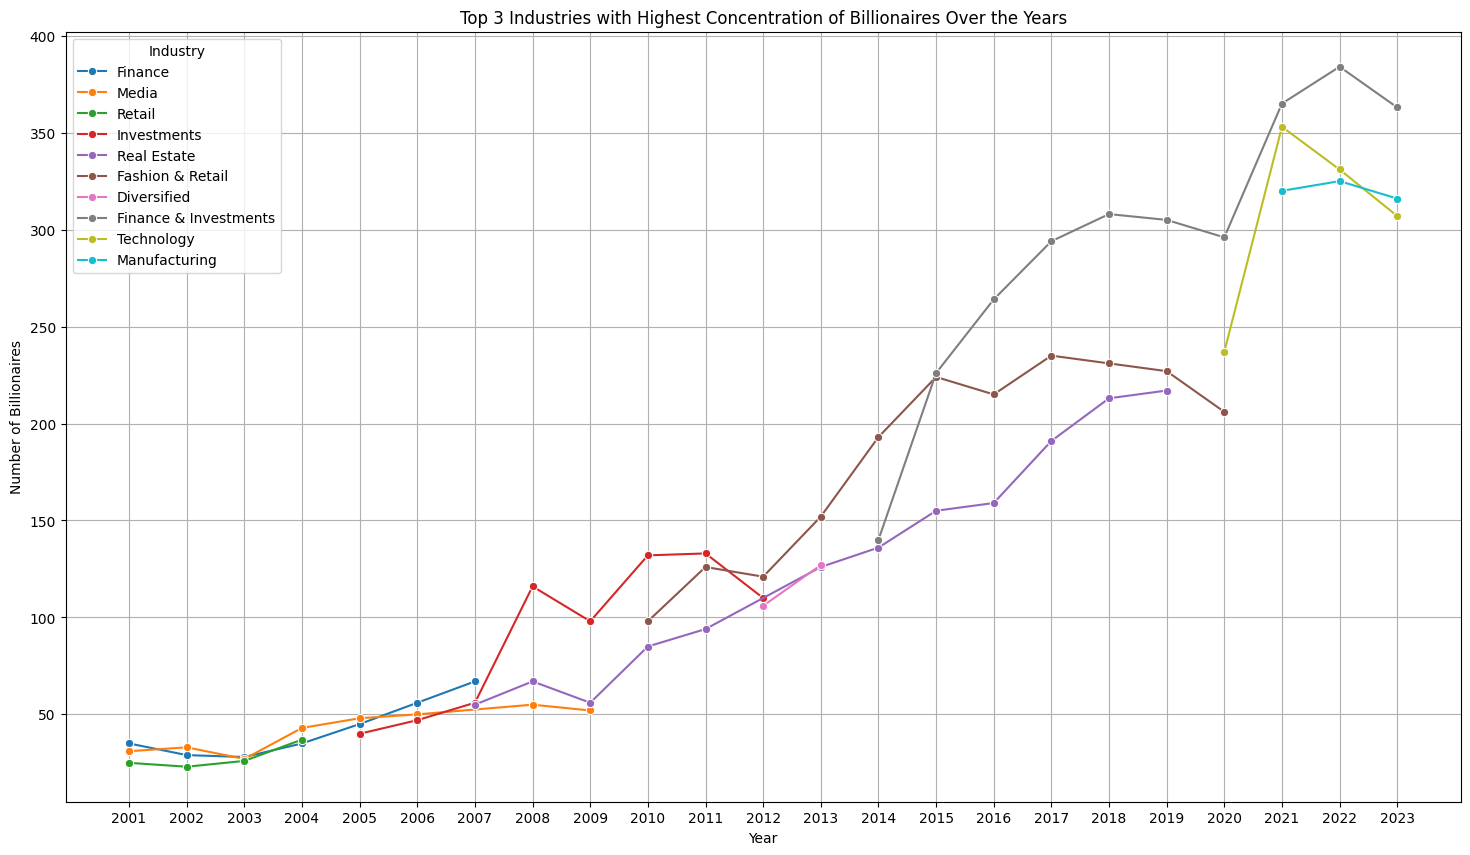

In [214]:
data = df

industry_counts = data.groupby(['year', 'business_industries']).size().reset_index(name='count')
top3_industries = industry_counts.groupby('year').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

plt.figure(figsize=(18, 10))
sns.lineplot(data=top3_industries, x='year', y='count', hue='business_industries', marker='o')
plt.title('Top 3 Industries with Highest Concentration of Billionaires Over the Years')
plt.xlabel('Year')
plt.xticks(top3_industries['year'].unique())
plt.ylabel('Number of Billionaires')
plt.legend(title='Industry')
plt.grid(True)
plt.show()

### **2.1.5. Guaranteed industries: Omar**

Context: You would like to start a new business in 2024, but you want your business to be special through a product the bridges some different industries, so you need to choose the best industries to bridge.
#### **Q: What are the industries that are more guaranteed to generate profit based on the number of billionaires that work in the industry and the amount of net worth they have from their industries?**
*Features: industries, years, net worth, full_name*

#### **Observations:**

Based on the analysis of the scatter plot graph, the industries that are more likely to generate profit, judging by the number of billionaires and their net worth, are:


- **Technology**: High billionaire count and high average net worth, indicating a robust and lucrative industry.


- **Finance & Investments**: Also shows a significant number of billionaires with substantial net worth, suggesting stability and profitability.


- **Fashion & Retail** Notable for its number of billionaires and their wealth, making it a potentially profitable bridge industry.


These industries have demonstrated a ability to generate wealth and could be promising sectors to bridge in your new business venture for 2024.

However there might be a problem when it comes to working with these industires, given that the net-worht values are high as well as the number of bilionaries which can indicate monoply or satisfies market.

So, based on the analysis of the scatter plot graph, the industries that are more likely to generate profit, judging by the moderate number of billionaires and their net worth, are:


- **Food & Beverage**: Moderate billionaire count and moderate average net worth.


- **Diversified**: Moderate billionaire count and moderate average net worth.


- **Real Estate:** Moderate billionaire count and moderate average net worth.

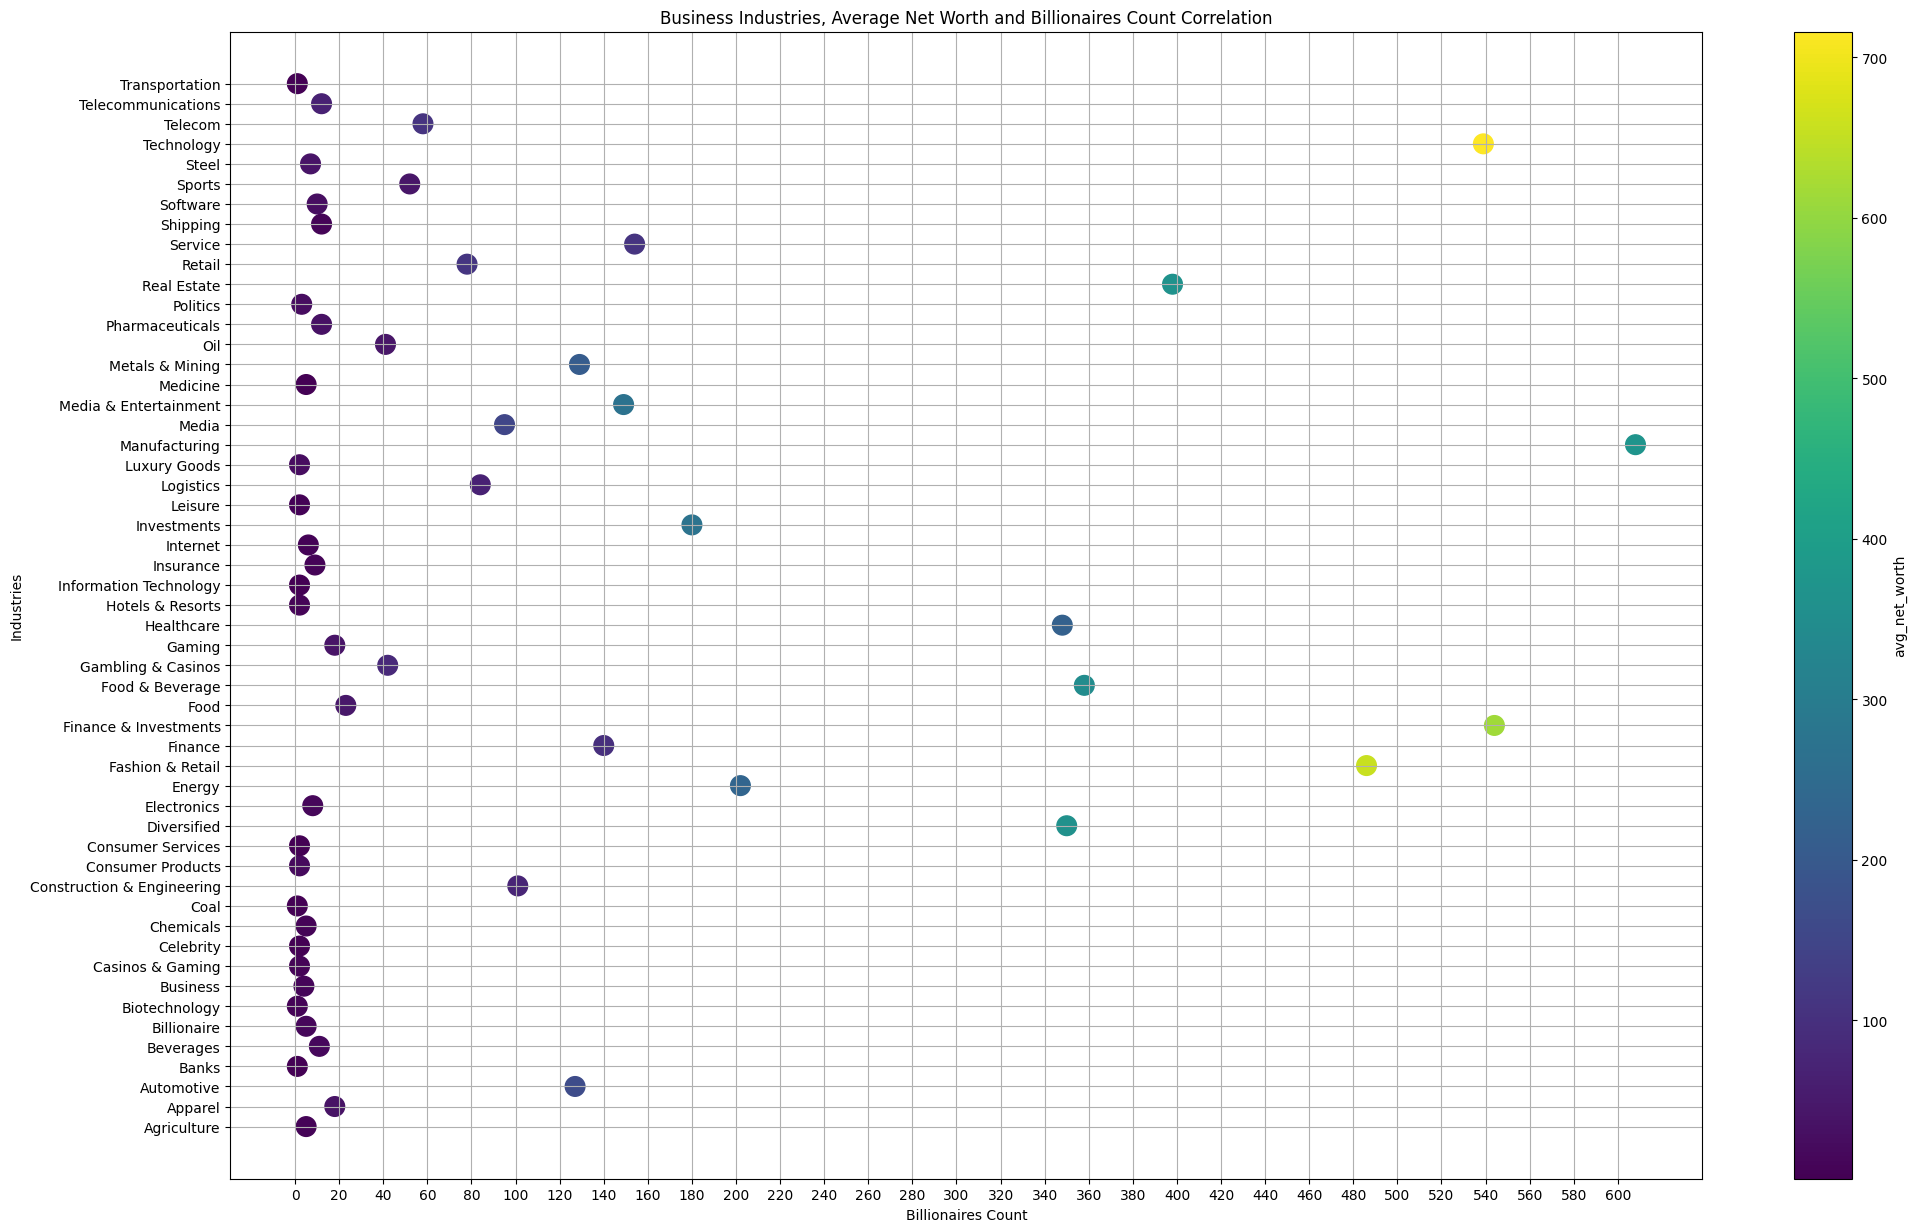

In [215]:
industry_net_worth_sum = df.groupby(['business_industries', 'year'])['net_worth'].sum()

# Calculating the average net worth for each industry over the years
industry_avg_net_worth = industry_net_worth_sum.groupby('business_industries').mean()

# Getting the count of billionaires for each industry
industry_count = df.groupby('business_industries')['full_name'].nunique()

# Extracting industry names and data for plotting
industries = industry_avg_net_worth.index.tolist()
avg_net_worth = industry_avg_net_worth.values.tolist()
billionaires_count = industry_count.values.tolist()

# Creating a DataFrame
data = {
    'industries': industries,
    'avg_net_worth': avg_net_worth,
    'billionaires_count': billionaires_count
}
df_plt = pd.DataFrame(data)

# Plotting scatter plot
df_plt.plot.scatter(x='billionaires_count', y='industries', title='Business Industries, Average Net Worth and Billionaires Count Correlation', c='avg_net_worth', colormap='viridis', s=200)
plt.xlabel('Billionaires Count')
plt.ylabel('Industries')
plt.subplots_adjust(top=2.5, right=3)
plt.grid(True)
plt.xticks(np.arange(0, df_plt['billionaires_count'].max(), 20))
plt.show()

### **2.1.6. Safe industries: Omar**

Context: You want to invest your money in some startups, but you would like to make sure that your investment is in only the safest industries.
#### **Q: What are the safest industries to invest in that grew (or) took the least damage during the global economic crisis in 2008 and Covid?**
*Features: industries, years, net worth*

#### **Observations:**

Based on the data from the provided heatmap,the following are the safest industries to invest in, based on their performance during the 2008 economic crisis:


- **Diversified**: Made a lot more money, going from 17.2 to 100.2, which is a big jump of 80.1. Seems like they can handle tough times pretty well.


- **Metals & Mining**:  Also got richer, going from 11.2 to 39.9, which is a difference of 28.7. People always need metal, so they kept doing okay.

- **Sports**: Didn't really change much during the 2008 money mess.


- **Healthcare**: Lost a little money, going from 25.1 to 40.5, but it wasn't too bad, just 6.5 less. Probably because everyone needs doctors no matter what.

Other industries like **Automotive**, **Food**, and **Logistics** had some problems but got better, so they might be okay for investing like **Finance, Media, Real Estate, Investments, and Manufacturing**, which experienced significant losses.


However, the industries during the Covid period showed interniting insights. Here’s a discussion based on the differences between the two years and the industries that have shifted in ranking:

- **Technology**: Got even better, so it seems like a really safe bet now.


- **Fashion & Retail and Finance & Investments**: also experienced growth, though not as like Technology.


- **Healthcare**: Got a little bit better, staying pretty steady.


- **Manufacturing**: saw a drop, indicating a shift in its position as a safe investment industry.


**Industries that have left the top spots include:**

**Sports, Construction & Engineering, and Gambling & Casinos**, which either grew minimally or declined, suggesting they may not be the safest industries for investment during economic downturns.


When we look at both the economic ciris in 2008 and the Covid mess, it seems like industries that are needed or embracing technology are safer to put money into. And the rankings changing shows that what's safe to invest in can change a lot depending on what's happening with money.

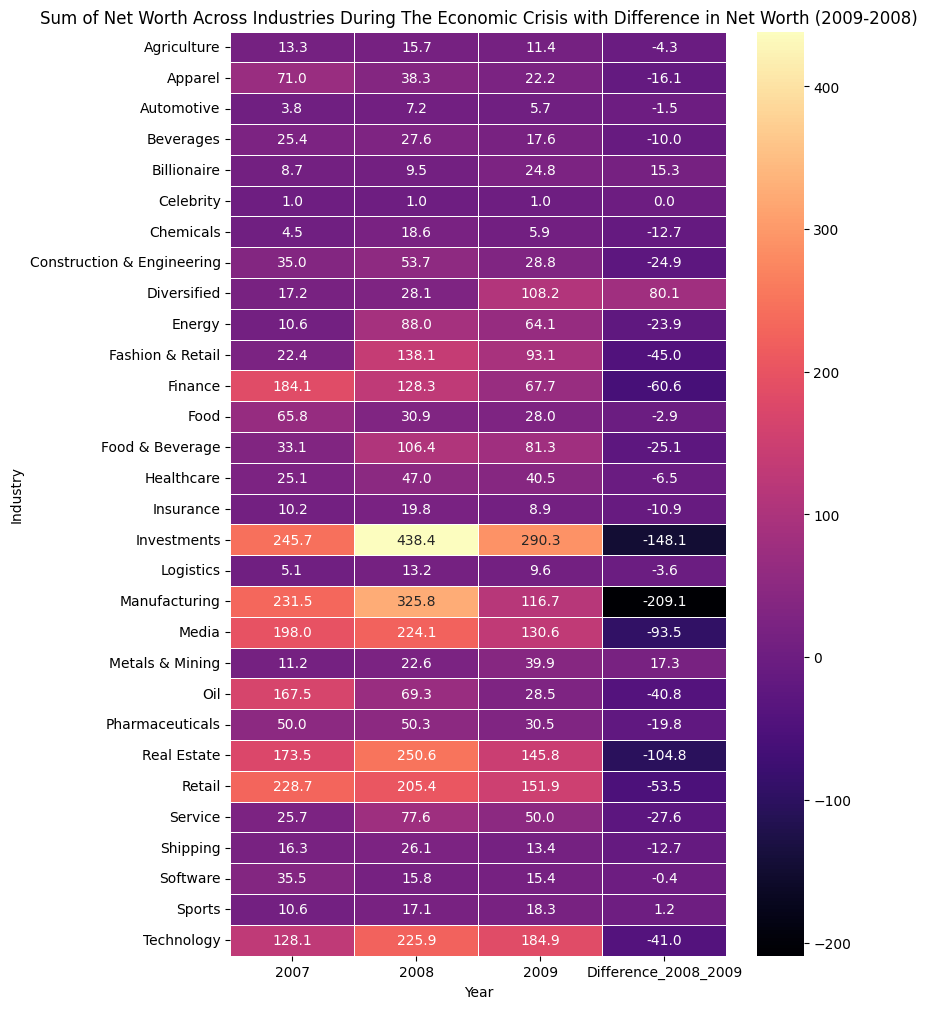

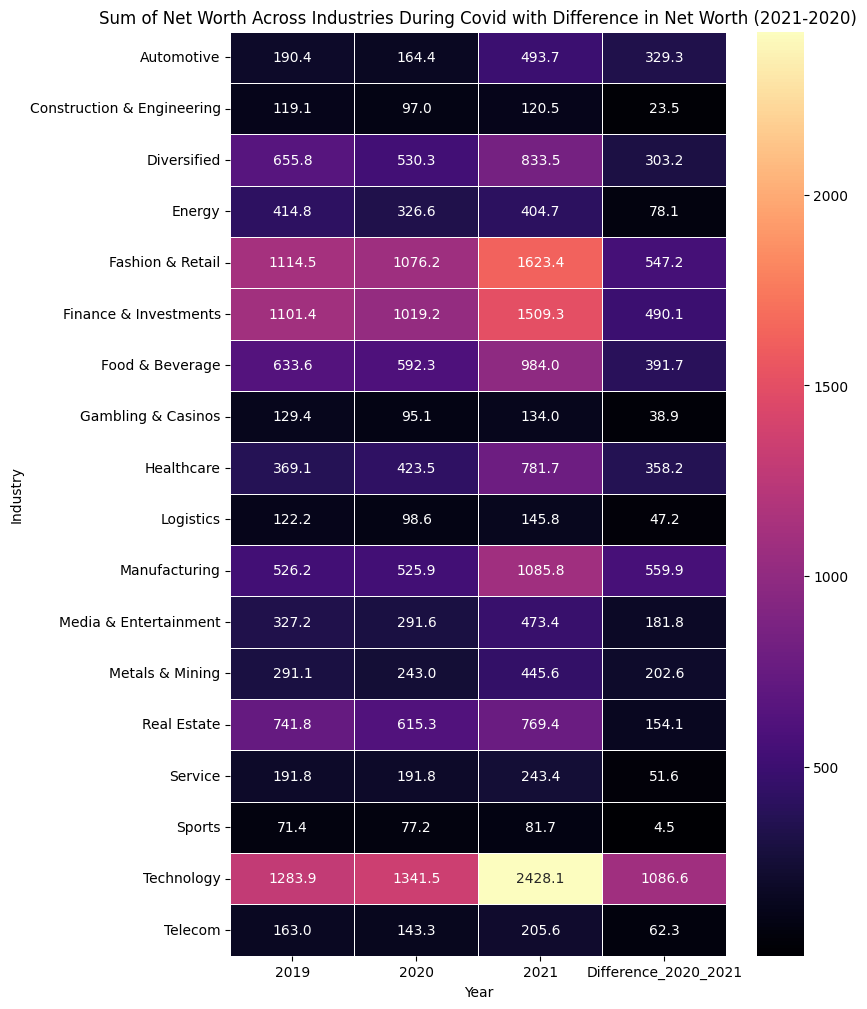

In [216]:
def study_years(year1, year2,year3, text):
    # Filter data for the years
    filtered_data_year1 = df[df['year'] == year1]['business_industries']
    filtered_data_year2 = df[df['year'] == year2]['business_industries']
    filtered_data_year3 = df[df['year'] == year3]['business_industries']

    common_data = set(filtered_data_year1) & set(filtered_data_year2) & set(filtered_data_year3)

    filtered_common_data = df[df['business_industries'].isin(common_data)]

    filtered_data = filtered_common_data[filtered_common_data['year'].isin([year1, year2, year3])]

    # Group data by year and industry, and sum the net worth
    grouped_data = filtered_data.groupby(['year', 'business_industries'])['net_worth'].sum().reset_index()

    # Pivot the data for easy plotting
    pivot_data = grouped_data.pivot(index='business_industries', columns='year', values='net_worth')

    # Calculate the difference between year2 and year3 net worth for each industry
    pivot_data[f'Difference_{year2}_{year3}'] = pivot_data[year3] - pivot_data[year2]

    # Plotting
    plt.figure(figsize=(8, 12))
    sns.heatmap(pivot_data, cmap='magma', annot=True, fmt=".1f", linewidths=0.5)
    plt.title(f'Sum of Net Worth Across Industries During {text} with Difference in Net Worth ({year3}-{year2})')
    plt.xlabel('Year')
    plt.ylabel('Industry')
    plt.show()
study_years(2007,2008,2009, "The Economic Crisis")
study_years(2019,2020,2021, "Covid")

# **3. Exploratory Analysis**

## **3.1 Data Scrapping**

### **3.1.1 Fetching HTML Pages**

#### **3.1.1.1 Imports**

In [217]:
import requests
import pandas as pd
import typing as t
from bs4 import BeautifulSoup
import re

#### **3.1.1.2 Scrapping websites links**

In [218]:
urls = {
    "taxes": "https://en.wikipedia.org/wiki/List_of_countries_by_tax_rates",
    "gni": "https://en.wikipedia.org/wiki/List_of_countries_by_GNI_(PPP)_per_capita",
    "startup_friendly_rating": "https://www.indexventures.com/rewarding-talent/when-are-employees-taxed",
}

#### **3.1.1.3 Fetching the pages and storing them in a dictionary**

In [219]:

def get_data(urls: t.List[str]) -> t.Dict[str, str]:
    data = {}
    for k, v in urls.items():
        res = requests.get(v)
        if res.status_code < 200 or res.status_code > 299:
            raise Exception(f"Failed to get data for {k} from url {v}")

        data[k] = res.text

    return data


data = get_data(urls)

### **3.1.2 Extracting Taxes Data**

#### **3.1.2.1 Function for texas extracting**

In [220]:
def extract_taxes(html: str) -> t.Dict[str, t.List[str]]:
    data = {
        "countries": [],
        "coporate_taxes": [],
        "lowest_marginal_rate": [],
        "highest_marginal_rate": [],
    }

    soup = BeautifulSoup(html, "html.parser")
    table = soup.select_one("table.wikitable")

    for row in table.select("tbody tr")[2:]:
        cells = [cell.text.split("%")[0] for cell in row.select("td")[1:4]]
        country_name = row.select_one("a").text

        data["countries"].append(country_name)
        for key, value in zip(list(data.keys())[1:], cells):
            data[key].append(value)


    return data

#### **3.1.2.2 Defining funcitons for cleaning**

In [221]:
def clean_coporate_taxes(tax: str):
    if tax.startswith("\n"):
        tax = tax[1:]

    tax = tax.split("–")[-1]
    return tax.split("-")[-1]


def clean_numerical_data(rate: str):
    res = re.findall(r"\d+\.?\d?", rate)
    return None if len(res) == 0 else res[0] 

#### **3.1.2.3 Cleaning Teaxes Data**

In [222]:
taxes = extract_taxes(data["taxes"])
taxes_df = pd.DataFrame(taxes); 

taxes_df["coporate_taxes"] = taxes_df["coporate_taxes"].apply(clean_coporate_taxes)
taxes_df["highest_marginal_rate"] = taxes_df["highest_marginal_rate"].apply(clean_numerical_data)
taxes_df["lowest_marginal_rate"] = taxes_df["lowest_marginal_rate"].apply(clean_numerical_data) 

features = ["coporate_taxes", "lowest_marginal_rate", "highest_marginal_rate"]
for f in features:
    taxes_df[f] = taxes_df[f].astype(float)

df.dropna(inplace=True)

#### **3.1.2.4 Merging the taxes data**

In [223]:

merged_df = pd.merge(df, taxes_df, how='inner',left_on='country_of_citizenship', right_on='countries')

# Dropping duplicated coutnries features 
merged_df.drop(columns={'countries'}, axis=1, inplace=True)
merged_df

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,country_of_citizenship,country_of_residence,city_of_residence,business_industries,self_made,wealth_status,birth_year,coporate_taxes,lowest_marginal_rate,highest_marginal_rate
0,2021,4,2674.0,1.0,Adair,A.,A. Jayson Adair,1969-10-16,51.0,Male,United States,United States,Dallas,Automotive,True,returned to list,1969,21.0,10.0,51.6
1,2022,4,2448.0,1.1,Adair,A.,A. Jayson Adair,1969-10-16,52.0,Male,United States,United States,Dallas,Automotive,True,increased,1969,21.0,10.0,51.6
2,2023,4,2133.0,1.3,Adair,A.,A. Jayson Adair,1969-10-16,53.0,Male,United States,United States,Dallas,Automotive,True,increased,1969,21.0,10.0,51.6
3,2001,7,151.0,3.0,Perenchio,A.,A. Jerrold Perenchio,1931-01-01,70.0,Male,United States,United States,Bel Air,Media,False,returned to list,1931,21.0,10.0,51.6
4,2002,3,152.0,2.6,Perenchio,A.,A. Jerrold Perenchio,1931-01-01,71.0,Male,United States,United States,Bel Air,Media,False,decreased,1931,21.0,10.0,51.6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29704,2021,4,2035.0,1.5,Masiyiwa,Strive,Strive Masiyiwa,1961-01-29,60.0,Male,Zimbabwe,United Kingdom,London,Telecom,True,increased,1961,25.0,0.0,45.0
29705,2022,4,1012.0,3.0,Masiyiwa,Strive,Strive Masiyiwa,1961-01-29,61.0,Male,Zimbabwe,United Kingdom,London,Telecom,True,increased,1961,25.0,0.0,45.0
29706,2023,4,1575.0,1.9,Masiyiwa,Strive,Strive Masiyiwa,1961-01-29,62.0,Male,Zimbabwe,United Kingdom,London,Telecom,True,decreased,1961,25.0,0.0,45.0
29707,2014,3,1465.0,1.1,Ruparelia,Sudhir,Sudhir Ruparelia,1956-01-01,58.0,Male,Uganda,Uganda,Kampala,Diversified,True,returned to list,1956,30.0,NaN,NaN


### **3.1.3 Extracting Startup-Friendly Countries Index**

In [224]:
def extract_startup_friendly_index(html: str) -> t.Dict[str, t.List[str]]:
    data = {
        "country": [],
        "total_score": [],
        "plan_score": [],
        "strike_price": [],
        "minority_holders_bureaucracy": [],
        "employee_tax_timing": [],
        "employee_tax_rate": [],
        "employer_taxation": [],
        "ranking": [],
    }

    soup = BeautifulSoup(html, "html.parser")
    table = soup.select_one("table.table__country-analysis")
    bodies = table.select("tbody")
    for tbody in bodies:
        curr_ranking = tbody.select_one("td.cell__ranking div.rotate-90").text
        for tr in tbody.select("tr"):
            country = tr.select_one("th").text
            data["country"].append(country)
            data["ranking"].append(curr_ranking)

            for key, value in zip(list(data.keys())[1:8], tr.select("td")[:8]):
                data[key].append(value.text)

    return data


startup_friendly_index = extract_startup_friendly_index(data["startup_friendly_rating"])
print(startup_friendly_index)

{'country': ['Latvia', 'Estonia', 'Lithuania', 'Israel', 'Canada', 'France', 'UK', 'Portugal', 'US', 'Poland', 'Italy', 'Sweden', 'Ireland', 'Australia', 'Denmark', 'Netherlands', 'Switzerland', 'Norway', 'Czech Republic', 'Finland', 'Austria', 'Spain', 'Germany', 'Belgium'], 'total_score': ['30', '30', '30', '27', '27', '26', '25', '24', '24', '23', '22', '21', '20', '16', '15', '15', '14', '14', '14', '13', '13', '11', '10', '10'], 'plan_score': ['5', '5', '5', '5', '5', '5', '3', '3', '4', '4', '3', '2', '2', '1', '1', '1', '1', '2', '1', '1', '1', '1', '1', '1'], 'strike_price': ['5', '5', '5', '4', '4', '4', '5', '3', '4', '3', '3', '3', '3', '4', '2', '3', '3', '3', '4', '2', '2', '2', '1', '2'], 'minority_holders_bureaucracy': ['5', '5', '5', '5', '5', '5', '3', '5', '5', '3', '3', '3', '4', '1', '3', '3', '3', '3', '2', '3', '3', '2', '2', '1'], 'employee_tax_timing': ['5', '5', '5', '5', '5', '5', '4', '5', '4', '5', '5', '5', '4', '4', '3', '3', '3', '3', '5', '3', '4', '4', 

#### **3.1.3.1 Merging the startup data**

In [225]:
startup_df= pd.DataFrame(startup_friendly_index); 
merged_df = pd.merge(merged_df, startup_df[startup_df['country'] != 'Israel'], how='left',left_on='country_of_residence', right_on='country') 
merged_df.drop(columns={'country'}, axis=1, inplace=True)
merged_df

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,...,lowest_marginal_rate,highest_marginal_rate,total_score,plan_score,strike_price,minority_holders_bureaucracy,employee_tax_timing,employee_tax_rate,employer_taxation,ranking
0,2021,4,2674.0,1.0,Adair,A.,A. Jayson Adair,1969-10-16,51.0,Male,...,10.0,51.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2022,4,2448.0,1.1,Adair,A.,A. Jayson Adair,1969-10-16,52.0,Male,...,10.0,51.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2023,4,2133.0,1.3,Adair,A.,A. Jayson Adair,1969-10-16,53.0,Male,...,10.0,51.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2001,7,151.0,3.0,Perenchio,A.,A. Jerrold Perenchio,1931-01-01,70.0,Male,...,10.0,51.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2002,3,152.0,2.6,Perenchio,A.,A. Jerrold Perenchio,1931-01-01,71.0,Male,...,10.0,51.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29704,2021,4,2035.0,1.5,Masiyiwa,Strive,Strive Masiyiwa,1961-01-29,60.0,Male,...,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29705,2022,4,1012.0,3.0,Masiyiwa,Strive,Strive Masiyiwa,1961-01-29,61.0,Male,...,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29706,2023,4,1575.0,1.9,Masiyiwa,Strive,Strive Masiyiwa,1961-01-29,62.0,Male,...,0.0,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
29707,2014,3,1465.0,1.1,Ruparelia,Sudhir,Sudhir Ruparelia,1956-01-01,58.0,Male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### **3.1.4 Extracting GNI Index**

#### **3.1.4.1 Function for extracting GNI data**

In [226]:
def extract_gni_index(html: str):
    data = {
        "country": [],
        "gni_year": [],
        "gni": [],
        "gni_2000": [],
        "gni_2010": [],
        "gni_2020": [],
        "growth_rate": [],
    }
    
    soup = BeautifulSoup(html, "html.parser")
    table = soup.select_one("table.wikitable")
    rows = table.select("tbody tr")[1:]
    for row in rows:
        cells = row.select("td")[1:]
        for key, value in zip(list(data.keys()), cells):
            data[key].append(value.text if value.text else None)
    
    # Clean countries' names
    data["country"] = list(map(lambda c: c[1:], data["country"]))
            
    return data
    

#### **3.1.4.2 Cleaning GNI Data**

In [227]:
    
gni_index = extract_gni_index(data["gni"])
gni_df = pd.DataFrame(gni_index); 
gni_df['growth_rate']= gni_df['growth_rate'].apply(clean_numerical_data)

gni_df.dropna(inplace=True)

int_features = ["gni", "gni_2000", "gni_2010", "gni_2020", "gni_year"]
for f in int_features:
    gni_df[f] = gni_df[f].apply(lambda x: x.replace(",", "")).astype(int)

gni_df['growth_rate'] = gni_df['growth_rate'].apply(lambda x: x.replace(",", "")).astype(float)

#### **3.1.4.3 Merging the GNI data**

In [228]:

merged_df = pd.merge(merged_df, gni_df, how='inner',left_on='country_of_citizenship', right_on='country') 
merged_df.drop(columns={'country'}, axis=1, inplace=True)
merged_df

,year,month,rank,net_worth,last_name,first_name,full_name,birth_date,age,gender,...,employee_tax_timing,employee_tax_rate,employer_taxation,ranking,gni_year,gni,gni_2000,gni_2010,gni_2020,growth_rate
0,2021,4,2674.0,1.0,Adair,A.,A. Jayson Adair,1969-10-16,51.0,Male,...,NaN,NaN,NaN,NaN,2022,77530,36800,49050,64770,2.8
1,2022,4,2448.0,1.1,Adair,A.,A. Jayson Adair,1969-10-16,52.0,Male,...,NaN,NaN,NaN,NaN,2022,77530,36800,49050,64770,2.8
2,2023,4,2133.0,1.3,Adair,A.,A. Jayson Adair,1969-10-16,53.0,Male,...,NaN,NaN,NaN,NaN,2022,77530,36800,49050,64770,2.8
3,2001,7,151.0,3.0,Perenchio,A.,A. Jerrold Perenchio,1931-01-01,70.0,Male,...,NaN,NaN,NaN,NaN,2022,77530,36800,49050,64770,2.8
4,2002,3,152.0,2.6,Perenchio,A.,A. Jerrold Perenchio,1931-01-01,71.0,Male,...,NaN,NaN,NaN,NaN,2022,77530,36800,49050,64770,2.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26255,2021,4,2035.0,1.5,Masiyiwa,Strive,Strive Masiyiwa,1961-01-29,60.0,Male,...,NaN,NaN,NaN,NaN,2022,2460,1740,1660,2060,0.8
26256,2022,4,1012.0,3.0,Masiyiwa,Strive,Strive Masiyiwa,1961-01-29,61.0,Male,...,NaN,NaN,NaN,NaN,2022,2460,1740,1660,2060,0.8
26257,2023,4,1575.0,1.9,Masiyiwa,Strive,Strive Masiyiwa,1961-01-29,62.0,Male,...,NaN,NaN,NaN,NaN,2022,2460,1740,1660,2060,0.8
26258,2014,3,1465.0,1.1,Ruparelia,Sudhir,Sudhir Ruparelia,1956-01-01,58.0,Male,...,NaN,NaN,NaN,NaN,2022,2650,1110,2060,2330,3.7


#### **3.1.5 Dropping unused scrapped features**

In [229]:
merged_df.drop(columns={"plan_score", "strike_price", "minority_holders_bureaucracy", "employee_tax_timing", "employee_tax_rate", "employer_taxation", "gni_year", "gni_2000", "gni_2010", "gni_2020", "growth_rate","lowest_marginal_rate", "highest_marginal_rate"}, axis=1, inplace=True) 

#### **3.1.6 Duplicated values**

In [230]:
merged_df.duplicated().sum()

0

#### **3.1.7 Null values**

Note: Null values in startup friendly ranking and total score couldn't be dropped given that the ranking only included 30 countires while the dataset had records that include 150 countries and that's why it genreates nulls, but it won't affect the analysis

In [231]:
merged_df.isnull().sum()

year                          0
month                         0
rank                          0
net_worth                     0
last_name                     0
first_name                    0
full_name                     0
birth_date                    0
age                           0
gender                        0
country_of_citizenship        0
country_of_residence          0
city_of_residence             0
business_industries           0
self_made                     0
wealth_status                 0
birth_year                    0
coporate_taxes                0
total_score               21324
ranking                   21324
gni                           0
dtype: int64

## **3.2 External Questions**

### **3.2.1 Citizenship status of billionaires**


**Q: How do tax rates and GNI index jointly influence the average net worth of billionaires in different countries?**

**Observations:**

- **Variability with Tax Rates:** The distribution of points across different tax rates shows a large variability in both the GNI index and the average net worth of billionaires. This suggests that the tax rate alone does not predict the average net worth of billionaires in a straightforward manner.

- **Concentration of Wealth:**
    - Countries with corporate tax rates ranging from approximately 0% to 20%, coupled with a GNI index of around 60,000 or less, tend to have billionaires with an average net worth in the vicinity of 40 billion.
    - Nations with tax rates between 20 and 30 percent, and a Gross National Income (GNI) of 80,000 or below, there's a significant diversity in wealth among billionaires. Furthermore, this band appears to encompass the majority of billionaire wealth.


- **Multifactorial Influences:** The graph underscores that billionaire net worth is likely influenced by a combination of many factors, such as specific economic policies, the health of global markets, sectors in which these billionaires have their wealth, and individual business acumen.

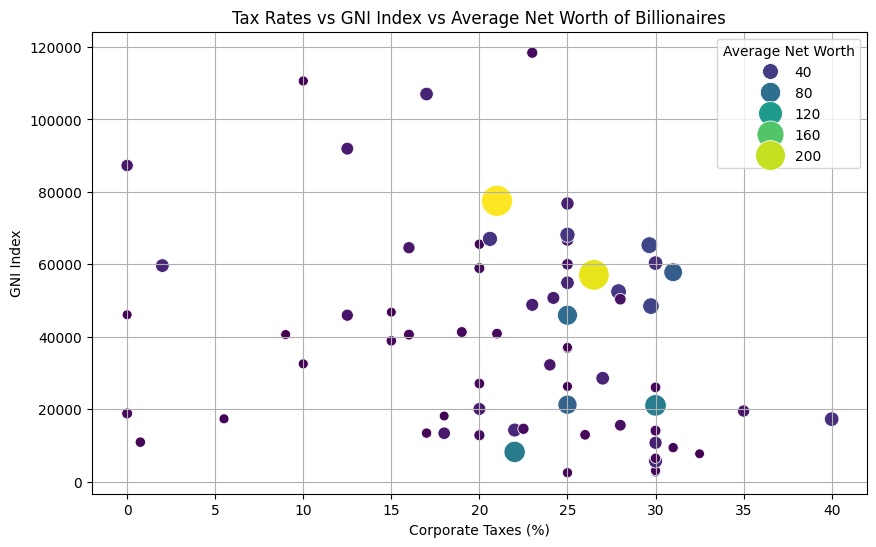

In [232]:
merged_df['gni']= merged_df['gni'].astype('float64')

avg_net_worth = merged_df.groupby(['coporate_taxes', 'gni'])['net_worth'].max()

avg_net_worth_df = avg_net_worth.reset_index()
avg_net_worth_df.dtypes

plt.figure(figsize=(10, 6))
sns.scatterplot(data=avg_net_worth_df, 
                x='coporate_taxes', 
                y='gni', 
                size='net_worth', 
                sizes=(50, 500), 
                hue='net_worth', 
                palette='viridis', 
                legend='brief')
plt.title('Tax Rates vs GNI Index vs Average Net Worth of Billionaires')
plt.xlabel('Corporate Taxes (%)')
plt.ylabel('GNI Index')
plt.legend(title='Average Net Worth')
plt.grid(True)
plt.show()

### **3.2.2 Start-up friendly countries**


**Q: What are the most start-up friendly countries for the top industries?**

**Obeservation**
Based on the data provided in the grpah,the most startup frinedly countries are: 

- **Germany**: Has the highest net-worth of its industires and highest startup friendly score in 3 out of the top industries

- **Swirzerland**: Has the highest net-worth of its industires and highest startup friendly score in 3 out of the top industries

- **France**: Has the highest net-worth in fshion industry as well as the highest networth for a country on the graph for highest startup friendly score

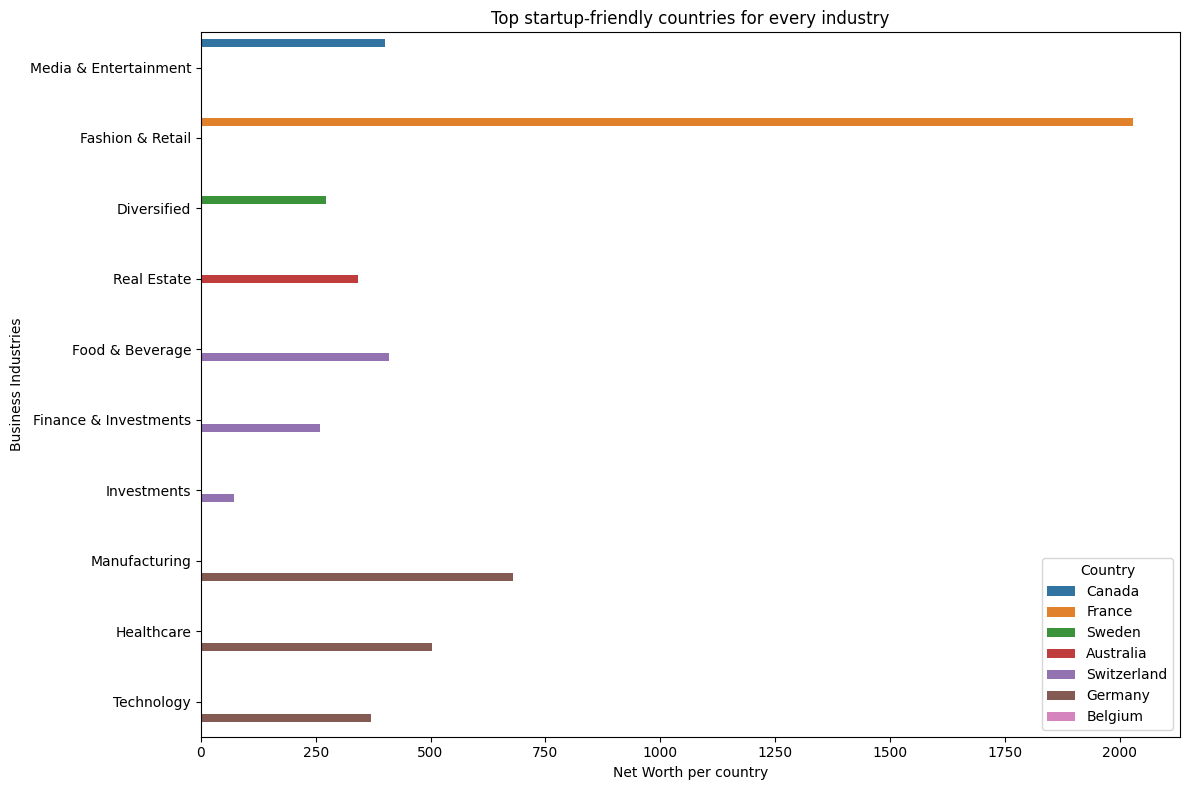

In [233]:
# Turning total score to intergers
merged_df['total_score']= merged_df['total_score'].astype('Int64')

# Only retriving the top industries based on total net worth
top_in= merged_df.groupby(['business_industries'])['net_worth'].sum().to_frame().reset_index().sort_values('net_worth',ascending=False).head(10) 

# Retriving the highest inudstries of net worth and all of their ranking countires
result1_df=merged_df.groupby(['business_industries','total_score', 'country_of_residence'])['net_worth'].sum().to_frame().reset_index() 

# Retriving the highest country of net worth of every industry
result2_df=result1_df.groupby(['business_industries'])['net_worth'].max().to_frame().reset_index()

# Retriving the 10 countries of net worth of top 10 industries
top_10_industries_countries=result1_df[
    result1_df['net_worth'].isin(result2_df['net_worth']) 
    & 
    result1_df['business_industries'].isin(top_in['business_industries'])
].sort_values(['total_score', 'net_worth'], ascending=[False, False]) 


plt.figure(figsize=(12, 8))
sns.barplot(y='business_industries', x='net_worth', hue='country_of_residence', data=top_10_industries_countries)
plt.title('Top startup-friendly countries for every industry')
plt.ylabel('Business Industries')
plt.xlabel('Net Worth per country') 
plt.legend(title='Country')
plt.tight_layout()
plt.show()

### **3.2.3 Guaranteed countries**


**Q: What are the most guaranteed countries to invest in?**

Based on the graph it was observed that:

- **Startup Friendly Score**: Lithuania has the highest score at 30, followed by Canada at 27 and France at 26.


- **GNI**: Nehterlands has the highest GNI, followed by Ireland, Poland and Australia, however, all of them rank low in Startup Friendly Score except for poland

So, the most guaranteed countries are Lithuania, Canada, France, Portugal and Poland

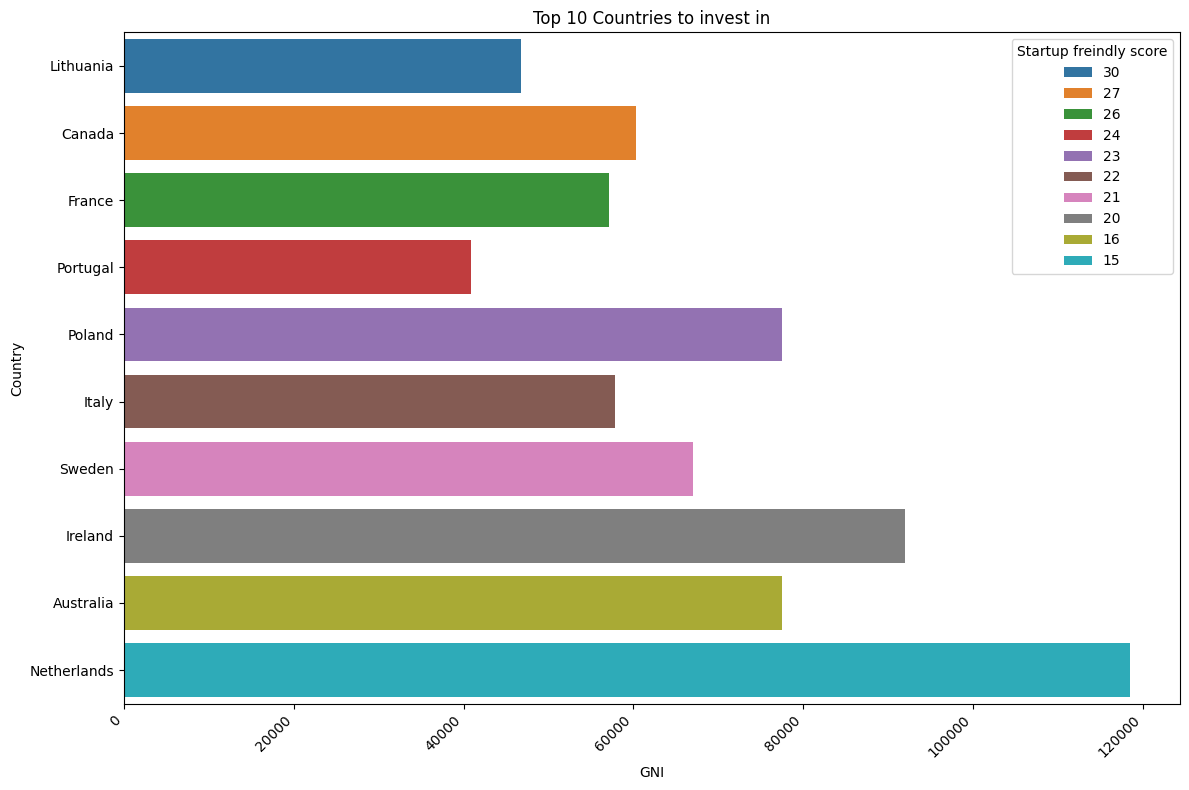

In [234]:
merged_df['gni']= merged_df['gni'].astype('int64')

top_10_safest_countries=merged_df.groupby(['country_of_residence', 'total_score'])['gni'].max().to_frame().reset_index().sort_values(['total_score', 'gni'], ascending=[False, False]).head(10)

top_10_safest_countries['total_score']=top_10_safest_countries['total_score'].astype('Int64')

top_10_safest_countries=top_10_safest_countries.sort_values(['total_score'], ascending=False)

top_10_safest_countries['total_score']=top_10_safest_countries['total_score'].astype(str)

plt.figure(figsize=(12, 8))
sns.barplot(x='gni', y='country_of_residence', hue='total_score', data=top_10_safest_countries)
plt.title('Top 10 Countries to invest in')
plt.xlabel('GNI')
plt.ylabel('Country')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Startup freindly score')
plt.tight_layout()
plt.show()

## **4. Hypothesis testing**

- **Null Hypothesis (H0):** There is no significant correlation between age and net worth among billionaires.

- **Alternative Hypothesis (H1):** There is a significant correlation between age and net worth among billionaires.

### **4.1 Retrives a sample of age and net_worth**

In [235]:
sample= df.sample(random_state=40, n=50)
ages= sample['age']
nets= sample['net_worth']
l1=len(ages)
l2=len(nets)
l1,l2

(50, 50)

### **4.2 Calculating the mean for every sample**

In [236]:
x1Mean=ages.mean()
x2Mean=nets.mean()
x1Mean,x2Mean

(60.94, 4.423)

### **4.3 Calculating variance of every sample**

In [237]:
x1var=ages.var(ddof=1)
x2var=nets.var(ddof=1)
x1var,x2var

(165.8126530612245, 89.49012346938774)

### **4.4 Estimating the Standard Error**
<img src='https://slideplayer.com/slide/5039206/16/images/20/Pooled+Estimate+of+the+Standard+Error+t-test+for+the+Difference+of+Means.jpg' width=500>

In [238]:
num=(l1-1)*x1var+(l2-1)*x2var
dem=l1+l2-2
part1=num/dem
part2=(1/l1)+(1/l2)
S=np.sqrt(part1*part2)
S

2.2596582773977674

### **4.5 Calculating T-score**
<img src='https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcTNswI-NkiSb3VS7MRRvwVvs32kpJarWjzF-g&usqp=CAU'>

In [239]:
tScore=(x1Mean-x2Mean)/S 
tScore

25.011303950385464

### **4.6 Degree of Freedom**

In [240]:
DegreeF=l1+l2-2
DegreeF

98

In [241]:
alpha = 0.05

### **4.7 T-score using scipy**

In [242]:
import scipy 
scipy.stats.t.ppf(1-alpha, DegreeF)

1.6605512170440568

In [243]:
scipy.stats.ttest_ind(ages, nets).statistic

25.011303950385464

### **4.8 Conclusion**

#### **Since t_score= 25.01 < table value alpha (0.05,98) = 1.660 , we reject H0**

- Based on the 0.05 level of statistical significance,
Age has a relationship with the amound of net_worth